In [15]:
setwd("/content/sample_data")

In [16]:
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("devtools")
devtools::install_github("kassambara/factoextra")
library("FactoMineR")
library("factoextra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpgAm8ic/remotes16f1eba2e3f/kassambara-factoextra-1689fc7/DESCRIPTION’ ... OK
* preparing ‘factoextra’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘factoextra_1.0.7.999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
df <- read.csv('liver_cirrhosis.csv')
head(df)
## response variable  : 'Stage'   ->  Multiclass classification

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149,4.04,227,598.0,52.70,57,256,9.9,1
2,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219,3.93,22,663.0,45.00,75,220,10.8,2
3,4184,C,Placebo,11839,F,N,N,N,N,0.5,320,3.54,51,1243.0,122.45,80,225,10.0,2
4,2090,D,Placebo,16467,F,N,N,N,N,0.7,255,3.74,23,1024.0,77.50,58,151,10.2,2
5,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486,3.54,74,1052.0,108.50,109,151,11.5,1
6,4427,C,Placebo,16418,F,N,N,N,N,1.9,259,3.70,281,10396.8,188.34,178,327,10.4,2


In [18]:
categorical_features <- c("Status", "Drug", "Sex", "Ascites", "Hepatomegaly","Spiders", "Edema")
numerical_features <- c('N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age')

# Print the lists
print("Numerical features:")
print(numerical_features)

print('--------------------------------------------------------------------------------------------')

print("Categorical features:")
print(categorical_features)

[1] "Numerical features:"
 [1] "N_Days"        "Bilirubin"     "Cholesterol"   "Albumin"      
 [5] "Copper"        "Alk_Phos"      "SGOT"          "Tryglicerides"
 [9] "Platelets"     "Prothrombin"   "Age"          
[1] "--------------------------------------------------------------------------------------------"
[1] "Categorical features:"
[1] "Status"       "Drug"         "Sex"          "Ascites"      "Hepatomegaly"
[6] "Spiders"      "Edema"       


In [19]:
column_names <- colnames(df)
print(column_names)

 [1] "N_Days"        "Status"        "Drug"          "Age"          
 [5] "Sex"           "Ascites"       "Hepatomegaly"  "Spiders"      
 [9] "Edema"         "Bilirubin"     "Cholesterol"   "Albumin"      
[13] "Copper"        "Alk_Phos"      "SGOT"          "Tryglicerides"
[17] "Platelets"     "Prothrombin"   "Stage"        


Here we have a mixed type data set as it cotains both numerical and categorical variables .But we can apply PCA only for numerical variables as it is all about capturing maximum amount  variation of our original data set .
### So lets apply PCA for our numerical variables

# Principle Component Analysis for numerical features

In [20]:
pca <- PCA(df[numerical_features],scale.unit = TRUE, graph = TRUE)

graph = TRUE   -> To produce the  scree plot , individual factor map , variables factor map , byplot )

scale.unit = TRUE  (In order to remove the impact of  the  scale of each individual variable we do standardize the data

In [21]:
pca

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 25000 individuals, described by 11 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard erro

## Now lets see the eigen values and the explained variance ratio of each principle component

In [22]:
eig.val <- get_eigenvalue(pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.7058657,24.598779,24.59878
Dim.2,1.3461666,12.237878,36.83666
Dim.3,1.1141845,10.128950,46.96561
Dim.4,0.9826833,8.933485,55.89909
Dim.5,0.9364530,8.513209,64.41230
Dim.6,0.8675474,7.886794,72.29910
Dim.7,0.7995718,7.268834,79.56793
Dim.8,0.7629205,6.935641,86.50357
Dim.9,0.5680469,5.164063,91.66763
Dim.10,0.4785318,4.350289,96.01792


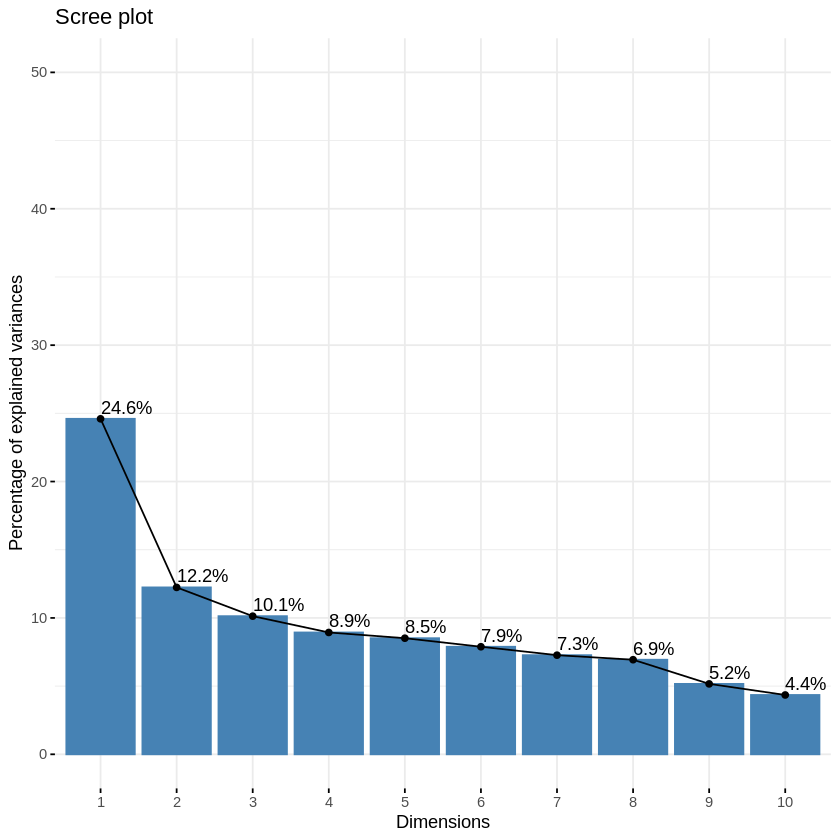

In [23]:
#### Now lets draw the scree plot
fviz_eig(pca, addlabels = TRUE, ylim = c(0, 50))

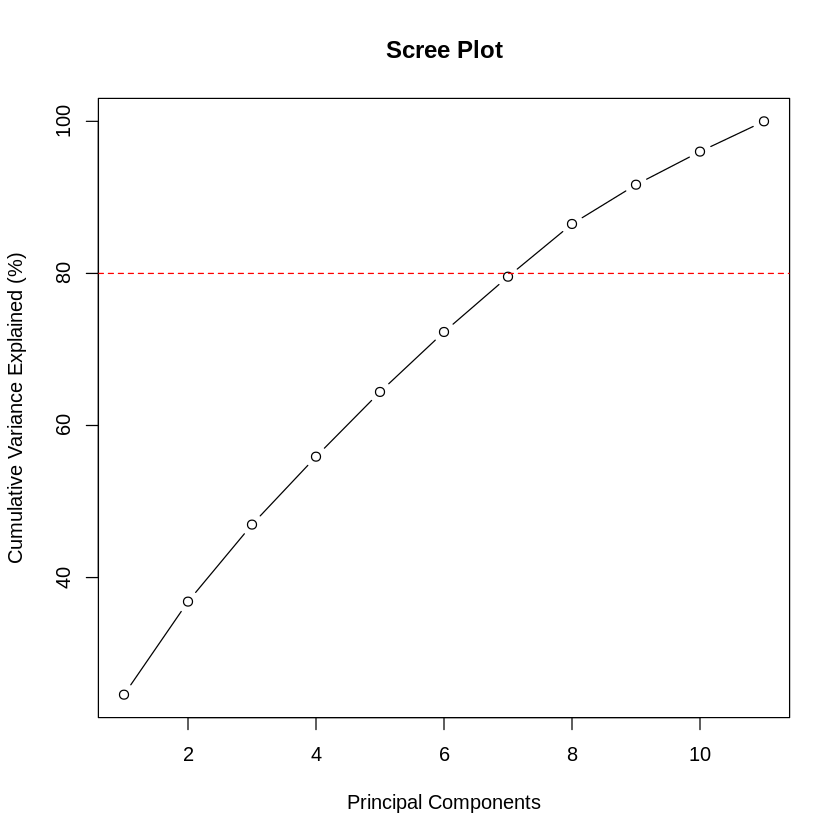

In [24]:
# Now to decide how many PCs to retain , lets get the plot of cumulative explained variance
eigenvalues <- pca$eig

# Compute the cumulative variance explained
cumulative_variance <- cumsum(eigenvalues[, 2])

# Plot the scree plot with cumulative variance
plot(1:length(cumulative_variance), cumulative_variance, type = "b", xlab = "Principal Components", ylab = "Cumulative Variance Explained (%)", main = "Scree Plot")
abline(h = 80, col = "red", lty = 2)  # Optional: Add a horizontal line at 80% for reference

#### So according to the above plot , we can clearly see that  the first 10Pcs together explain 80% of the total variation . So we can stick to either 7 or 8 PCs without using all the 11 original variables .

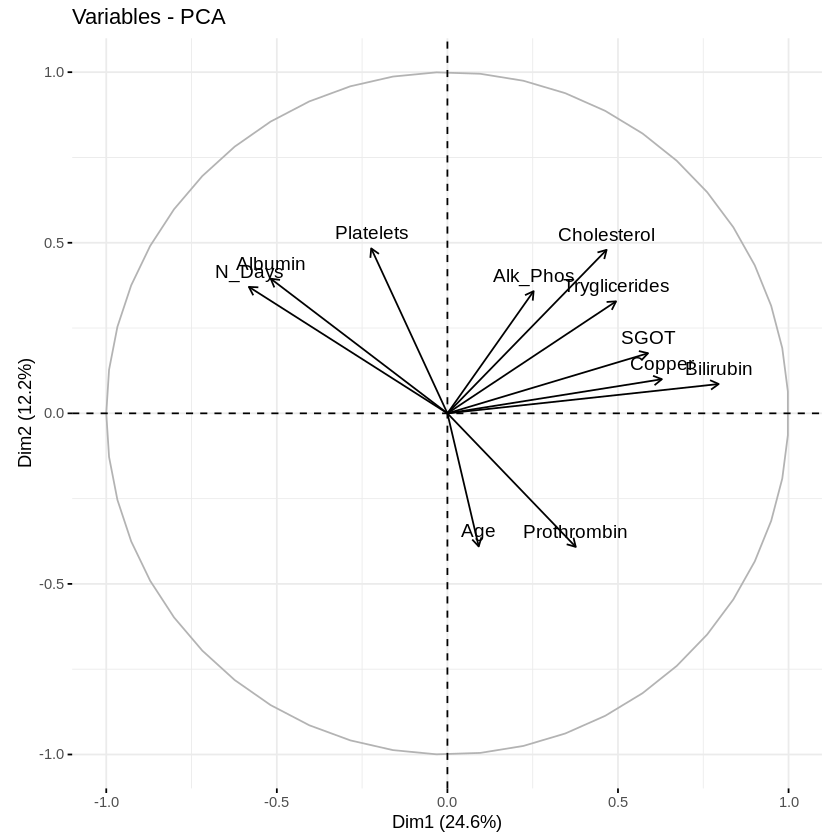

In [26]:
######### Correlation circle #############
## A correlation circle (or variables factor map) is a graphical representation in PCA that displays the correlations between the original variables and the principal
## components (PCs). It helps to understand the relationships between the variables and how they contribute to the principal components.

# Each arrow represents an original variable.
# The direction and length of the arrow indicate how strongly the variable is correlated with the PCs.
# Longer arrows indicate stronger contributions to the PCs.
# Variables pointing in the same direction are positively correlated.
## Variables pointing in opposite directions are negatively correlated.
# Variables at right angles are uncorrelated.
fviz_pca_var(pca, col.var = "black")


In [ ]:
#############################################################################################################################
##########################      Interpretation of the correlation circle plot     ###########################################
## Dim1 (24.6%): The first principal component explains 24.6% of the total variance.
## Dim2 (12.2%): The second principal component explains 12.2% of the total variance.

## Variable Contributions:

#Bilirubin: Strongly contributes to Dim1.
#Albumin, N_Days, Platelets: Contribute to both dimensions.
#Age, Prothrombin: Contribute mainly to Dim2.

#Variable Relationships:

#Variables pointing in the same direction are positively correlated.
#Variables pointing in opposite directions are negatively correlated.
#Variables perpendicular to each other are uncorrelated.

In [27]:
#######################################################################################################################
################################  Quality of representation  ##########################################################
# The quality of representation of the variables on factor map is called cos2 (square cosine, squared coordinates) . You can access to the cos2 as follow:

## The quality of representation of a variable on a principal component is measured by the squared cosine (cos²) of the angle between the variable
# vector and the axis of the principal component. This measure, also known as cos², indicates how well a variable is represented by the principal components.

# cos² values: Range from 0 to 1, where:
# Values close to 1 indicate that the variable is well represented by the principal component.
# Values close to 0 indicate that the variable is poorly represented by the principal component.
# This helps us  in assessing how well each variable is represented in the reduced dimension space and also help us to get an
# idea about  which variables contribute the most to the principal components and which might be less important.

In [ ]:
# Quality of representation
# The quality of representation of the variables on factor map is called cos2 (square cosine, squared
# coordinates) . You can access to the cos2 as follow:

In [30]:
var <- get_pca_var(pca)


In [31]:
head(var$cos2, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
N_Days,0.3385973,0.137368509,0.224686159,0.0019241582,0.021052781
Bilirubin,0.6322492,0.007388593,0.018280863,0.0003754864,0.001022946
Cholesterol,0.2176775,0.229589716,0.018558589,0.0384265622,0.159356005
Albumin,0.2683060,0.155776593,0.004131595,0.0055917402,0.099764436


In [32]:
var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
N_Days,0.338597263,0.137368509,0.2246861592,0.0019241582,0.021052781
Bilirubin,0.632249166,0.007388593,0.0182808625,0.0003754864,0.001022946
Cholesterol,0.217677504,0.229589716,0.0185585892,0.0384265622,0.159356005
Albumin,0.268305959,0.155776593,0.0041315947,0.0055917402,0.099764436
Copper,0.395184635,0.010011700,0.0053647780,0.0121189115,0.052255588
Alk_Phos,0.063824482,0.128190671,0.5917070174,0.0202011492,0.026564331
SGOT,0.345902251,0.031057710,0.0006098199,0.0079390730,0.197648770
Tryglicerides,0.244299934,0.107717791,0.0010856072,0.1371552210,0.074705426
Platelets,0.049867665,0.233670103,0.0513250797,0.0149584454,0.296124752
Prothrombin,0.141535290,0.153242544,0.0570857742,0.2323172877,0.005746607


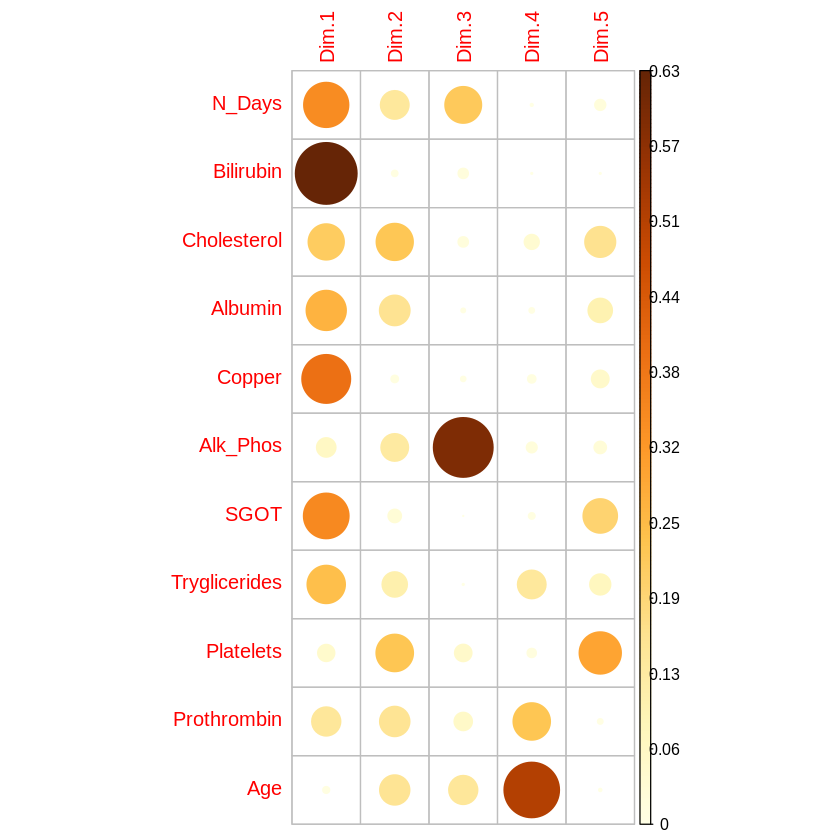

In [26]:
library("corrplot")
corrplot(var$cos2, is.corr=FALSE)

In [28]:
################# Intepretation of the above correlation plot ###################

##### Dim.1:
# Variable Bilirubin has the highest cos² values (darkest and largest circle), indicating that this variable is well represented on the first principal component.
# Other variables like N_Days, Copper, and SGOT have moderate cos² values, indicating moderate representation on Dim.1.

##### Dim.2:
# Platelets and Cholestrol have notable cos² values, indicating they are relatively well represented on the second principal component.
# Most other variables have low cos² values on Dim.2, suggesting they are not well captured by this dimension.

### Dim.3, Dim.4, Dim.5:
# Generally, most variables have low cos² values on these dimensions, suggesting that these dimensions do not capture significant information from these variables.
# Ak_phos has a higher cos² value on Dim.3, indicating it is well represented by this component.
# Age has a higher cos² value on Dim.4, indicating it is well represented by this component.

## By looking at that plot , we can make the following conclustions regarding the importance of features ,
# Bilirubin: This variable is the most important for Dim.1, meaning the first principal component captures a significant amount of information about this variable.
# Ak_phos: This variable is most important for Dim.3, indicating that the third principal component captures some information about this variable.
# Age: This variable is most important for Dim.4, indicating that the fourth principal component captures some information about this variable.


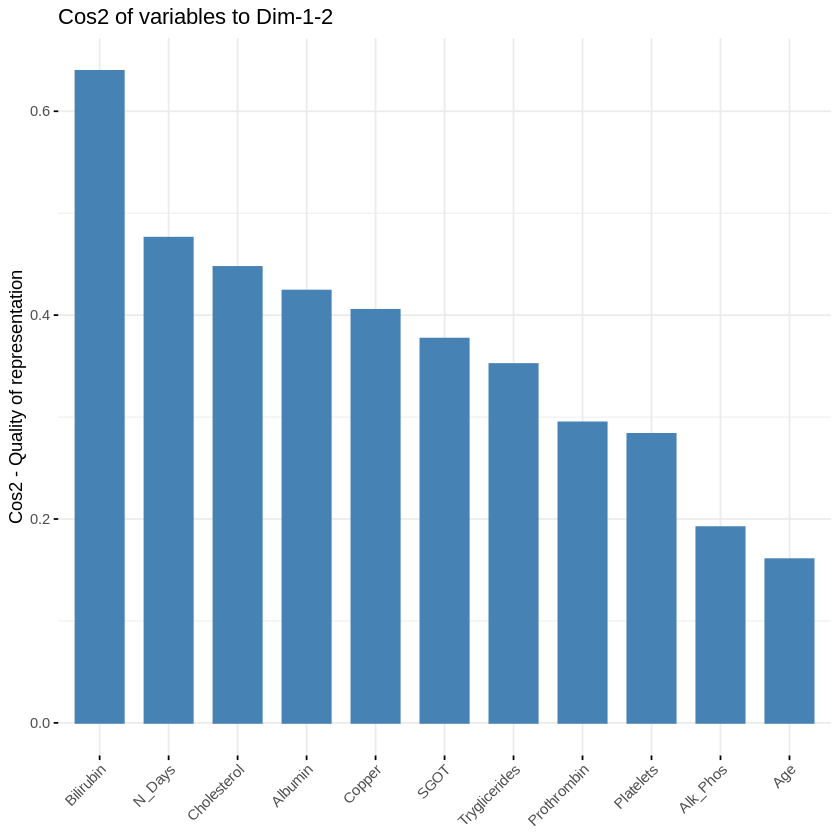

In [16]:
# The function fviz_cos2 from the factoextra package in R visualizes the squared cosine (cos²) values of the variables for specified principal components.
#  When you use the command fviz_cos2(pca, choice = "var", axes = 1:2), it generates a plot showing the quality of representation of each variable on the
# first two principal components (Dim.1 and Dim.2).
fviz_cos2(pca, choice = "var", axes = 1:2)

Details of the Plot
Cos² Values:

The cos² value for a variable on a principal component indicates how well the variable is represented by that component. Higher cos² values (close to 1) mean better representation, while lower values (close to 0) mean poorer representation.
Choice of "var":

The choice = "var" parameter specifies that the plot should focus on variables rather than individuals (observations).
Axes 1 and 2:

The axes = 1:2 parameter indicates that the plot should show the cos² values for the first two principal components (Dim.1 and Dim.2).
What the Plot Shows
The resulting plot will typically show a bar plot or a dot plot where:

The x-axis represents the variables.
The y-axis represents the cos² values for Dim.1 and Dim.2.
Interpreting the Plot
High cos² Values: Variables with high cos² values on Dim.1 and Dim.2 are well represented by these components. This means that these components capture most of the variability in these variables.
Low cos² Values: Variables with low cos² values are not well represented by Dim.1 and Dim.2. These variables might be better represented by other components or may not be well captured by the PCA model.


For example:

If Bilirubin has a high cos² value on Dim.1, it means that Dim.1 captures a significant amount of information about Bilirubin.
If N_days has a high cos² value on Dim.2, it means that Dim.2 captures a significant amount of information about N_days.
This helps in understanding the most informative dimensions for the variables in your dataset, aiding in dimensionality reduction and further analysis.

In [27]:
#This bar plot shows the cos2 (squared cosine) values, representing the quality of representation of each variable on the factor map (Dim1 and Dim2).

#High Representation:
#Bilirubin: Highest cos2 value, indicating it is well-represented by Dim1 and Dim2.
#N_Days, Cholesterol: Also well-represented.

#Lower Representation:
#Age, Alk_Phos: Lower cos2 values, indicating they are less well-represented by these dimensions.

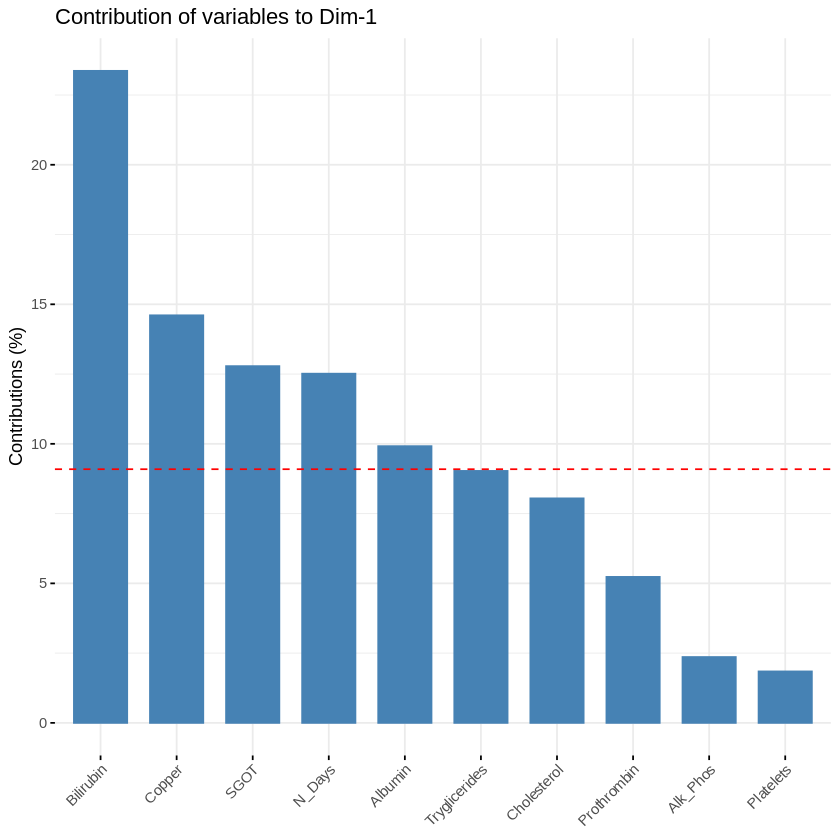

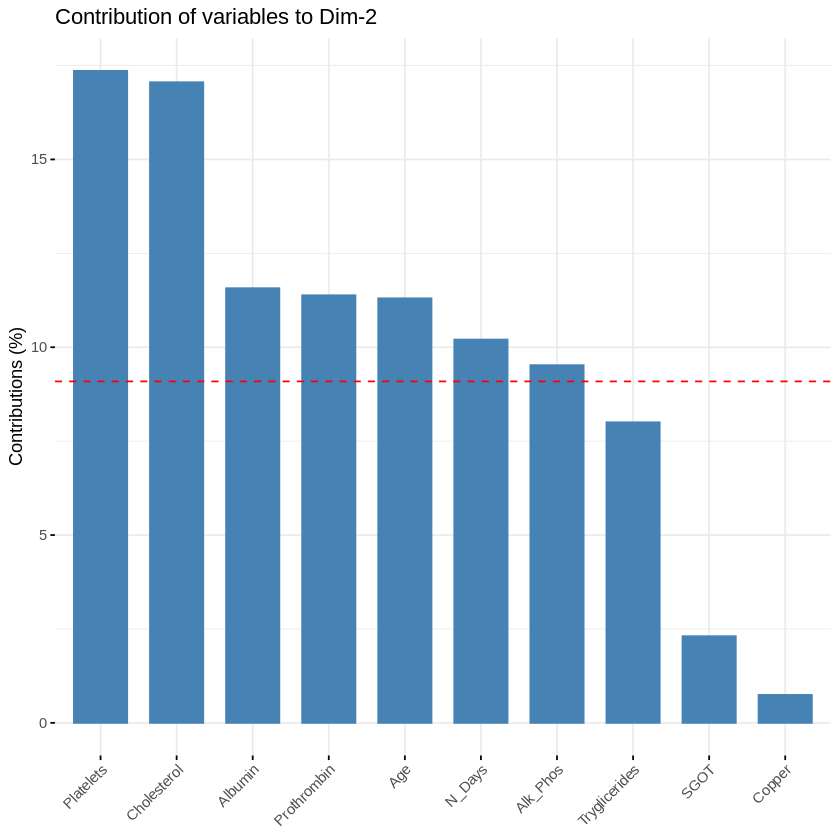

In [33]:
###################  We can also plot the contribution of each variable into specific PCs ###############
fviz_contrib(pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(pca, choice = "var", axes = 2, top = 10)

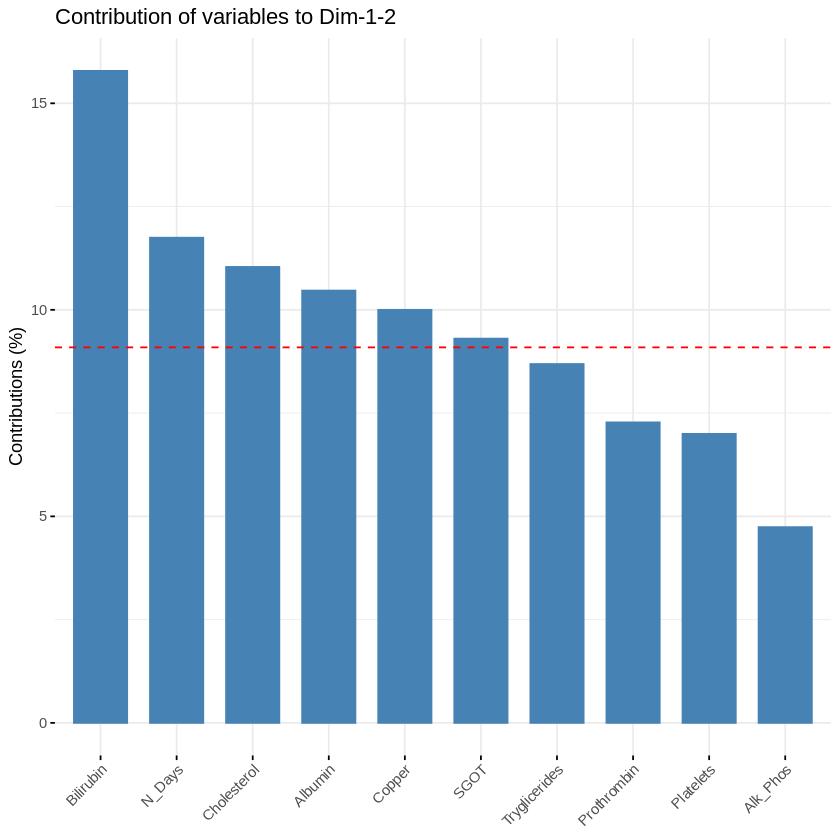

In [34]:
 #The total contribution to PC1 and PC2 is obtained with the following R code:
fviz_contrib(pca, choice = "var", axes = 1:2, top = 10)

In [35]:
## The red dashed line on the graph above indicates the expected average contribution. If the contribution
## of the variables were uniform, the expected value would be 1/length(variables) = 1/10 = 10%. For a
## given component, a variable with a contribution larger than this cutoff could be considered as important
## in contributing to the component.

# Note that, the total contribution of a given variable, on explaining the variations retained by two
# principal components, say PC1 and PC2, is calculated as contrib = [(C1 * Eig1) + (C2 * Eig2)]/(Eig1 +
# Eig2), where C1 and C2 are the contributions of the variable on PC1 and PC2, respectively
# Eig1 and Eig2 are the eigenvalues of PC1 and PC2, respectively. Recall that eigenvalues measure
# the amount of variation retained by each PC.
# In this case, the expected average contribution (cutoff) is calculated as follow: As mentioned above, if
# the contributions of the 10 variables were uniform, the expected average contribution on a given PC
# would be 1/10 = 10%. The expected average contribution of a variable for PC1 and PC2 is : [(10* Eig1)+ (10 * Eig2)]/(Eig1 + Eig2)

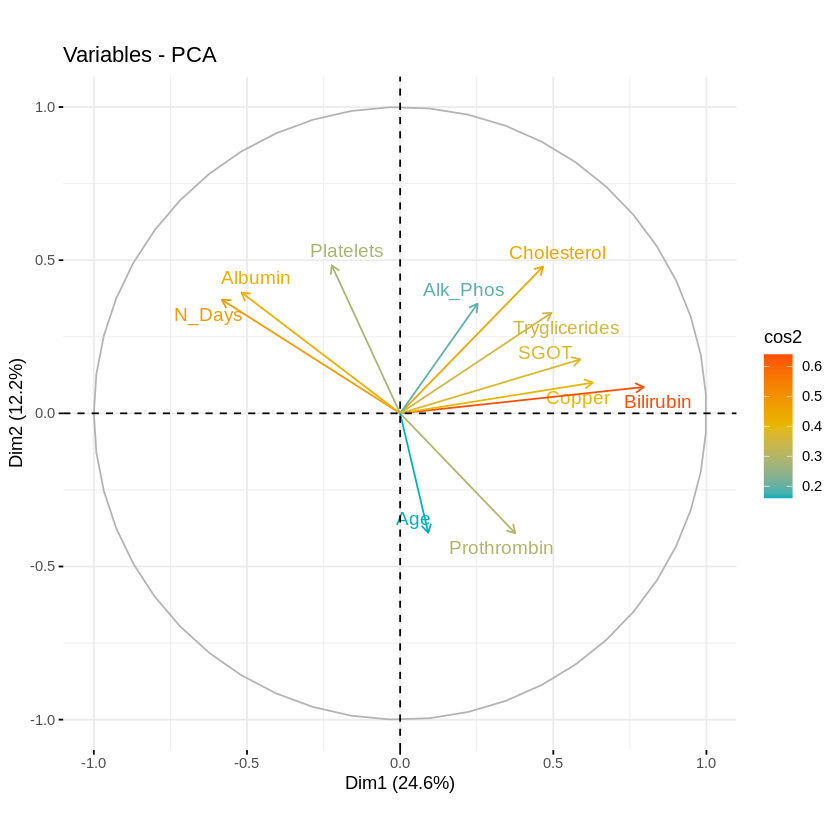

In [28]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(pca, col.var = "cos2",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE # Avoid text overlapping
)

In [ ]:
head(var$contrib, 4)

ERROR: Error in var$contrib: object of type 'closure' is not subsettable


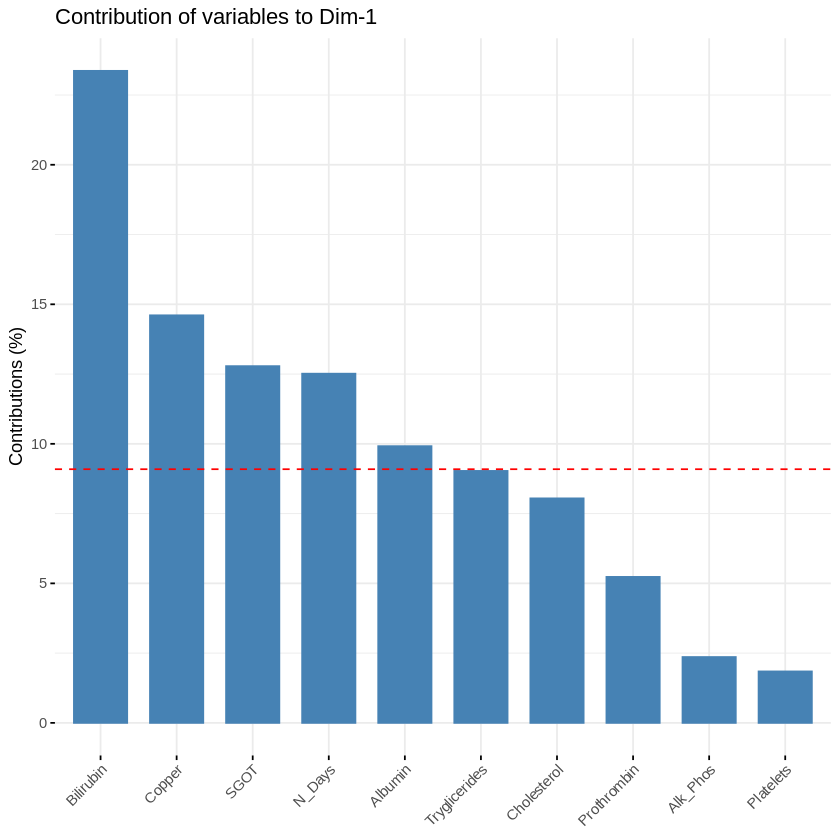

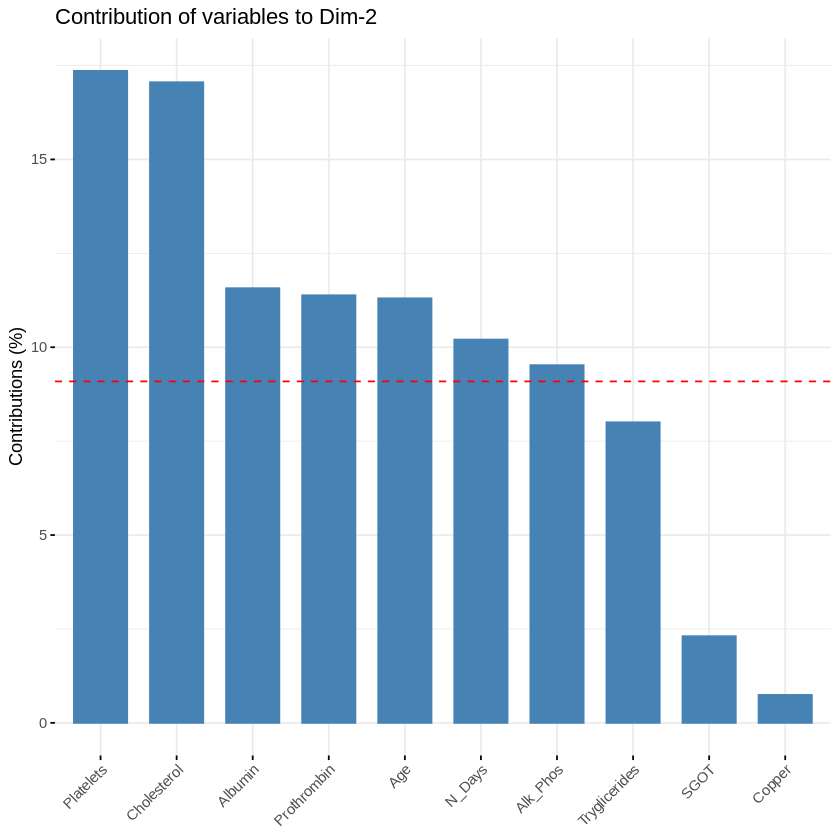

In [ ]:
fviz_contrib(pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(pca, choice = "var", axes = 2, top = 10)

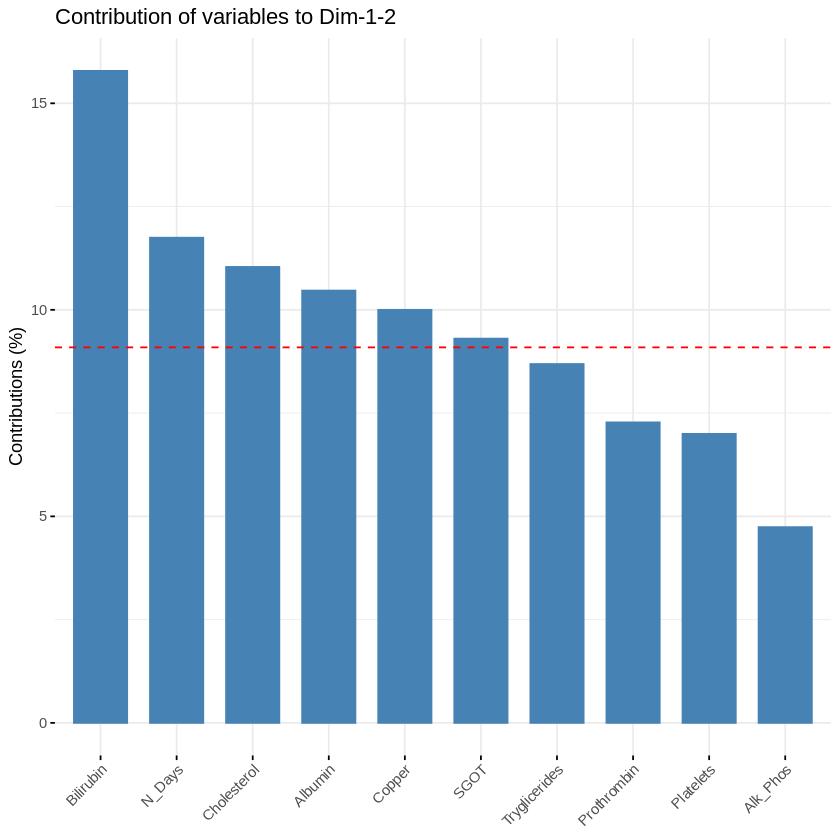

In [17]:
# The total contribution to PC1 and PC2 is obtained with the following R code:
fviz_contrib(pca, choice = "var", axes = 1:2, top = 10)


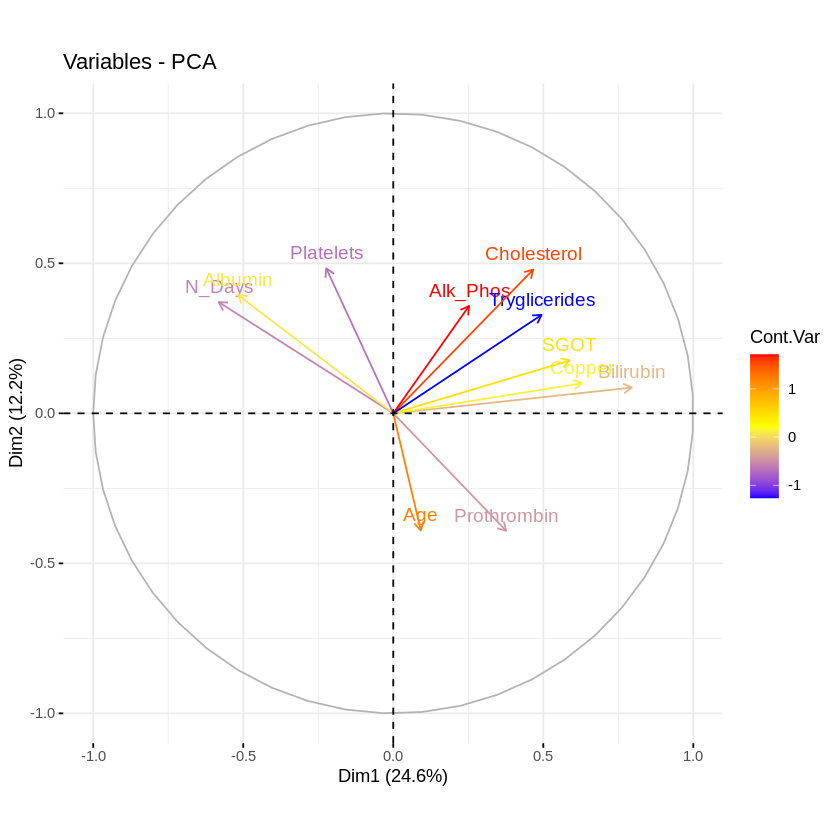

In [18]:
set.seed(123)
my.cont.var <- rnorm(11)  # 11 : because we have 11 numerical variables
fviz_pca_var(pca, col.var = my.cont.var,
gradient.cols = c("blue", "yellow", "red"),
legend.title = "Cont.Var")

In [ ]:
set.seed(123)
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
grp <- as.factor(res.km$cluster)

ERROR: Error in var$coord: object of type 'closure' is not subsettable


In [ ]:
fviz_pca_var(pca, col.var = grp,
palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
legend.title = "Cluster")

ERROR: Error in eval(expr, envir, enclos): object 'grp' not found


In [19]:
# Description of dimension 1
res.desc <- dimdesc(pca, axes = c(1,2), proba = 0.05)
res.desc$Dim.1

,correlation,p.value
Bilirubin,0.79514097,0.000000e+00
Copper,0.62863712,0.000000e+00
SGOT,0.58813455,0.000000e+00
Tryglicerides,0.49426707,0.000000e+00
Cholesterol,0.46655922,0.000000e+00
Prothrombin,0.37621176,0.000000e+00
Alk_Phos,0.25263508,0.000000e+00
Age,0.09176909,6.766187e-48
Platelets,-0.22331069,4.755407e-280
Albumin,-0.51798259,0.000000e+00


In [ ]:
# Description of dimension 2
res.desc$Dim.2

,correlation,p.value
Platelets,0.48339436,0.000000e+00
Cholesterol,0.47915521,0.000000e+00
Albumin,0.39468544,0.000000e+00
N_Days,0.37063258,0.000000e+00
Alk_Phos,0.35803725,0.000000e+00
Tryglicerides,0.32820389,0.000000e+00
SGOT,0.17623198,1.562975e-173
Copper,0.10005848,1.205518e-56
Bilirubin,0.08595693,3.238838e-42
Age,-0.39006753,0.000000e+00


In [36]:
###################  Get the scores ##############
head(var$contrib, 14)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
N_Days,12.5134541,10.2044211,20.16597434,0.19580655,2.2481407
Bilirubin,23.3658737,0.5488617,1.64073927,0.03821032,0.1092363
Cholesterol,8.0446529,17.0550744,1.66566572,3.91037091,17.0169780
Albumin,9.9157160,11.5718658,0.37081783,0.56902770,10.6534373
Copper,14.6047393,0.7437192,0.48149818,1.23324691,5.5801612
Alk_Phos,2.3587454,9.5226453,53.10673597,2.05571307,2.8366966
SGOT,12.7834227,2.3071223,0.05473240,0.80789741,21.1061062
Tryglicerides,9.0285313,8.0018172,0.09743513,13.95721490,7.9774878
Platelets,1.8429468,17.3581860,4.60651534,1.52220408,31.6219548
Prothrombin,5.2306842,11.3836239,5.12354771,23.64111468,0.6136568


In [37]:
###############################################################################################################################################
##############################################    Graph of individuals (observations)   #########################################################
################################################################################################################################################
################################################################################################################################################
##################################################################################################################################################

In [38]:
# The results, for individuals can be extracted using the function get_pca_ind() [factoextra package].
#  Similarly to the get_pca_var(), the function get_pca_ind() provides a list of matrices containing all the
#  results for the individuals (coordinates, correlation between variables and axes, squared cosine and
#  contributions)

In [ ]:
ind <- get_pca_ind(pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [39]:
######################################## # Importance of clustering    #########################################
## Identifying clusters in machine learning is crucial because it enhances model accuracy, customization, and efficiency. Clustering groups similar
## data points together, enabling the development of specialized models tailored to each segment’s unique characteristics. This leads to improved accuracy by
## reducing variability within each cluster, better personalization through targeted approaches, and more efficient resource allocation. By creating distinct segments
## and applying models separately, businesses can gain deeper insights and make more informed, data-driven decisions, ultimately leading to better outcomes and increased
## effectiveness in applications such as marketing, customer service, and anomaly detection.


################### Not only for cluster identification , but it is also important to identify the outliers as well .
#### Usually when we have more than 2 variables , it is not possible to visualize our data combinining all of those variables together . But in PCA , we can use first 2 PCs
##  as axis and get the projection of original data into this reduced space . We can use that to visualize our data and then we can use it to identify the groups,clusters of
### our data set . We can also use that to identify the   outliers as well by using that same plot


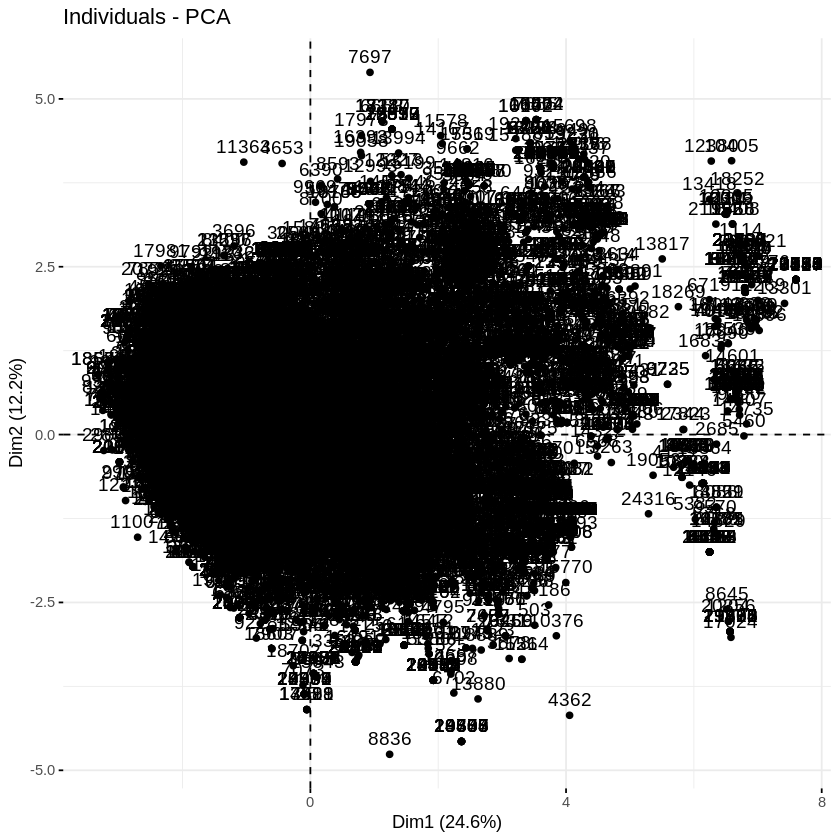

In [40]:
fviz_pca_ind(pca)
## This plot typically shows the first two principal components (Dim.1 and Dim.2) on the x-axis and y-axis, respectively. These components are linear combinations of the original variables
##  that capture the maximum variance in the data.

# Each point on the plot represents an observation from the dataset. The coordinates of these points are the scores of the observations on the principal components.




In [41]:
################## Here we can see that our plot is readable as we have huge amount of observations . But we can clealry see that while almost all the datat points
#  are scatterd in the center, there are few points which are far away from the center . That is an indication of the existence of clusters .



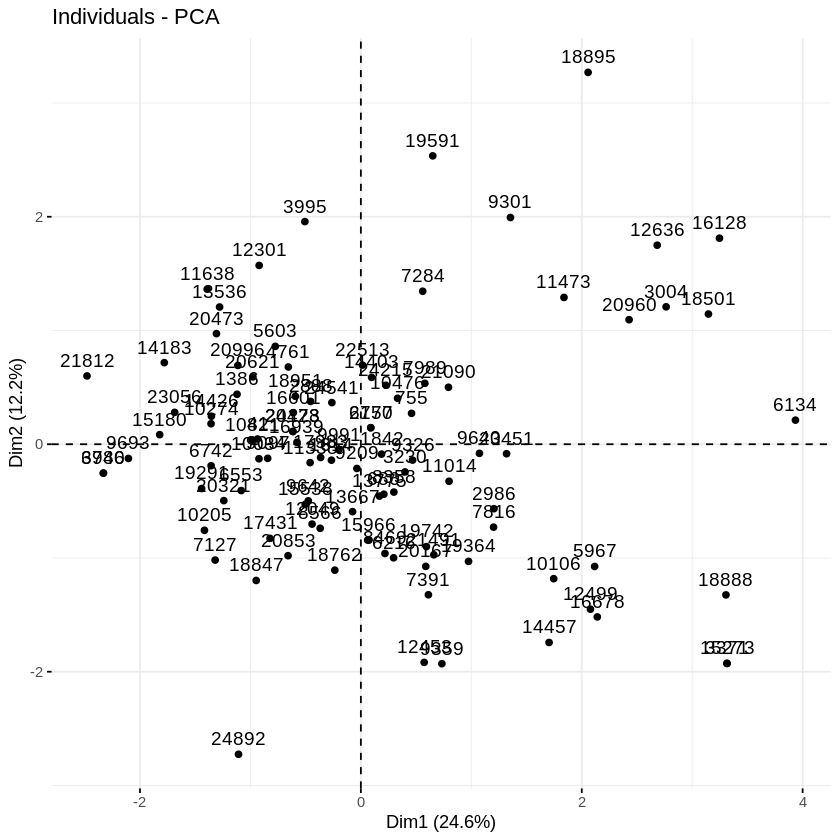

In [21]:
############################################################################################################################################################
############ Since it is not readable , to make it readable , lets take a random sample  of 100 observations and get the same plot for that 100 observations .


# Perform PCA on the entire dataset
pca <- PCA(df[numerical_features], scale.unit = TRUE, graph = FALSE)

# Extract the coordinates of the individuals
ind_coords <- pca$ind$coord

# Randomly sample 100 observations from the PCA results
set.seed(123)  # Setting seed for reproducibility
sampled_indices <- sample(1:nrow(ind_coords), 100)
sampled_coords <- ind_coords[sampled_indices, ]

# Extract other necessary components for the sampled individuals
sampled_cos2 <- pca$ind$cos2[sampled_indices, ]
sampled_contrib <- pca$ind$contrib[sampled_indices, ]

# Create a new PCA object with the sampled data for visualization purposes
pca_sampled <- list(
  eig = pca$eig,
  var = pca$var,
  ind = list(
    coord = sampled_coords,
    cos2 = sampled_cos2,
    contrib = sampled_contrib
  )
)

# Add class attributes to the new PCA object
class(pca_sampled) <- c("PCA", "list")

# Visualize the sampled individuals in the PCA space
fviz_pca_ind(pca_sampled)

In [42]:
######## Here we got 3 major  concerns .
##   (01)  We are only considering numerical variables for PCA (so here we ignore the impact of categorical variables )
##   (02) Both our first 2 PCs combined only explaine almost 37% of the total variations .
##   (03)  To get that plot we are using a random sample of 100 observations (we assume that , our sample is a good representation of the entire population )


####  So under those conditions , from above plot we can conclude there are no clear groupings but there are some outliers .

# Multiple Correspondence Analysis For Categorical Features

In [43]:
categorical_features

[1] "Status"       "Drug"         "Sex"          "Ascites"      "Hepatomegaly"
[6] "Spiders"      "Edema"

In [44]:
################################  Multiple  Correspondence Analysis   ###############################
df.active <- df[1:55, categorical_features]
df.active <- na.omit(df.active)
df.active[] <- lapply(df.active, factor)

In [46]:
df.active[categorical_features] <- lapply(df.active[categorical_features], factor)

In [47]:
summary(df.active)

 Status               Drug    Sex    Ascites Hepatomegaly Spiders Edema 
 C :31   D-penicillamine:16   F:47   N:33    N:31         N:30    N:44  
 CL: 3   Placebo        :39   M: 8   Y:22    Y:24         Y:25    S: 8  
 D :21                                                            Y: 3  

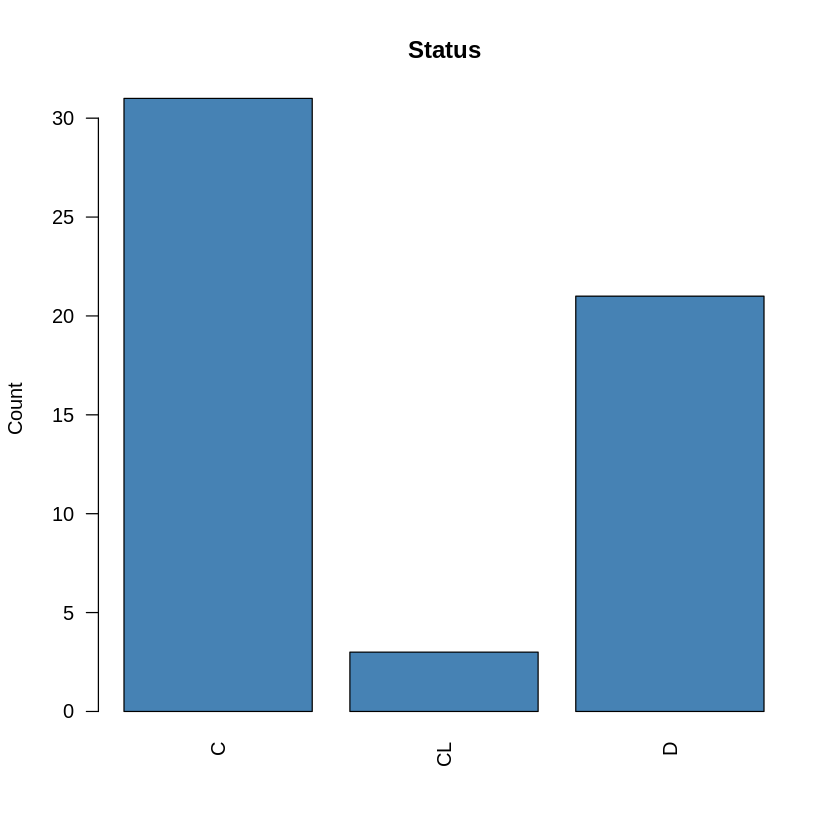

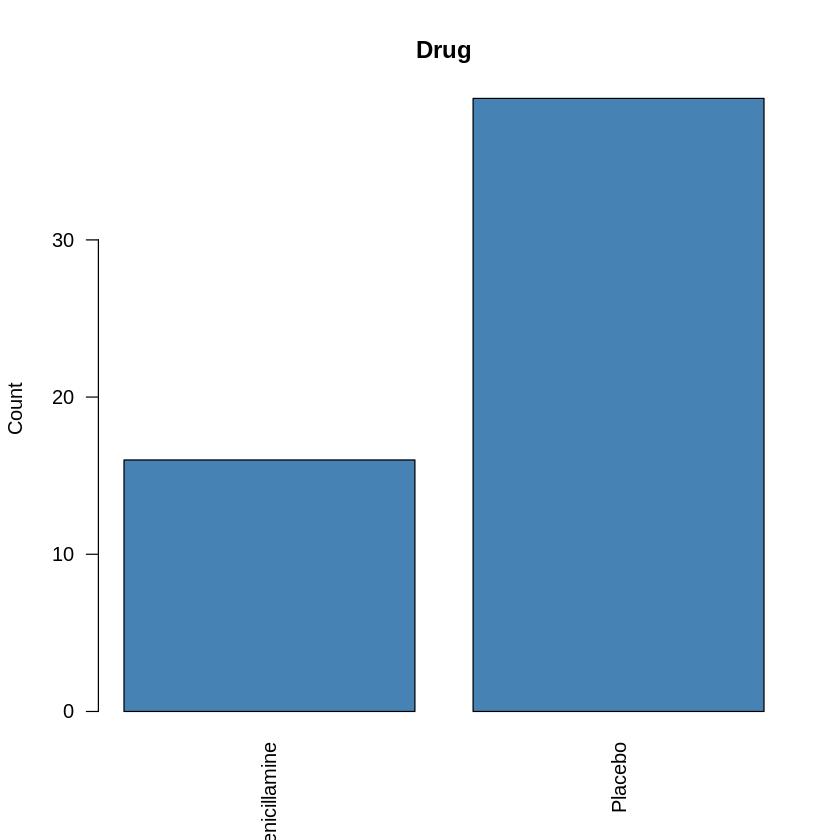

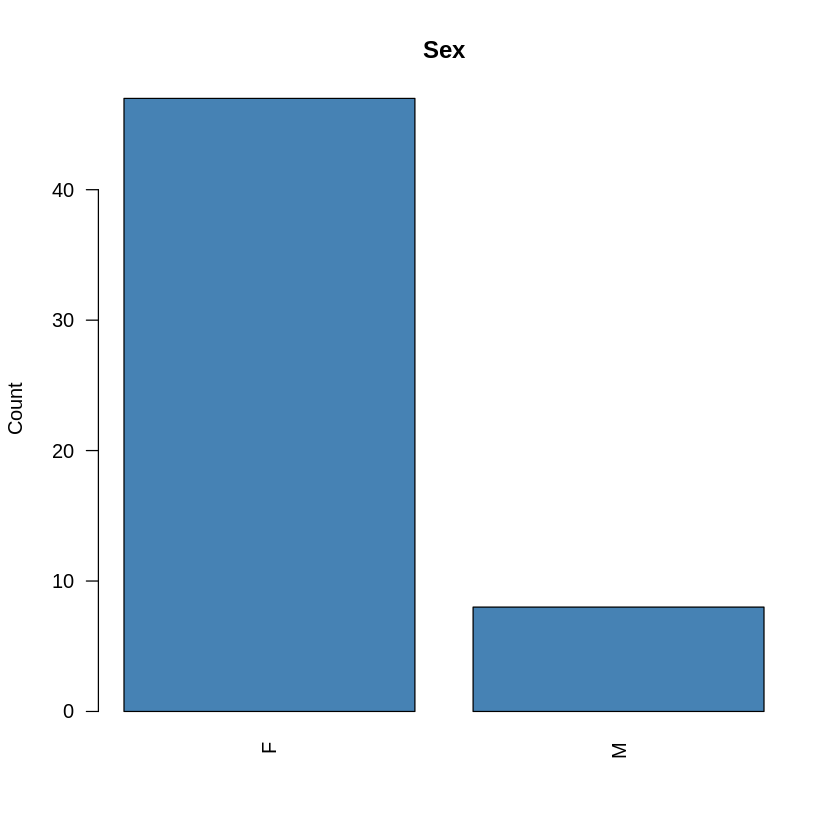

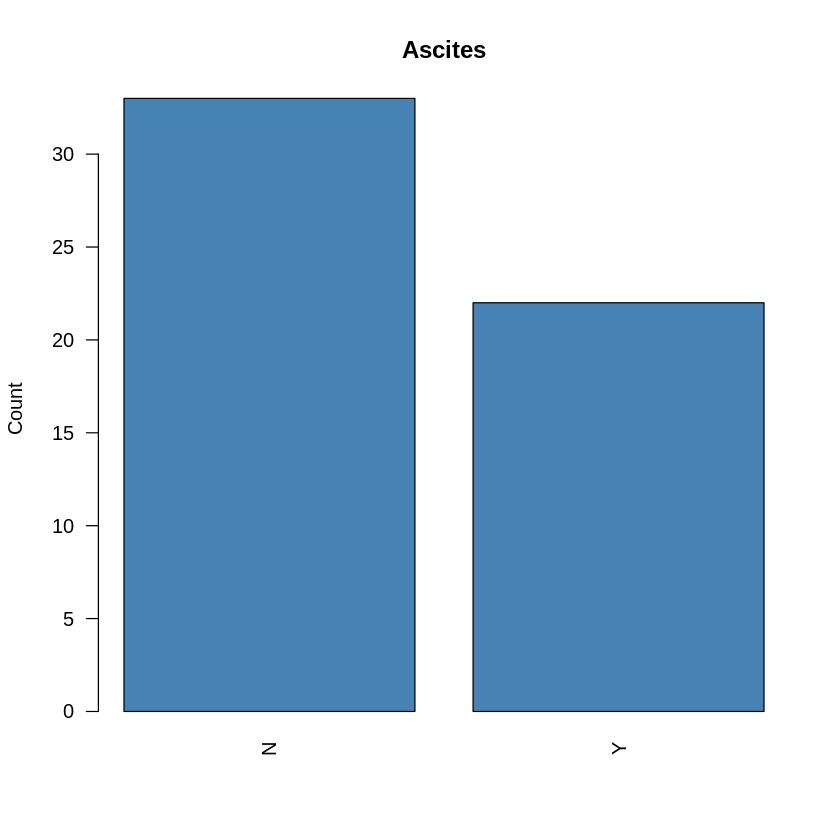

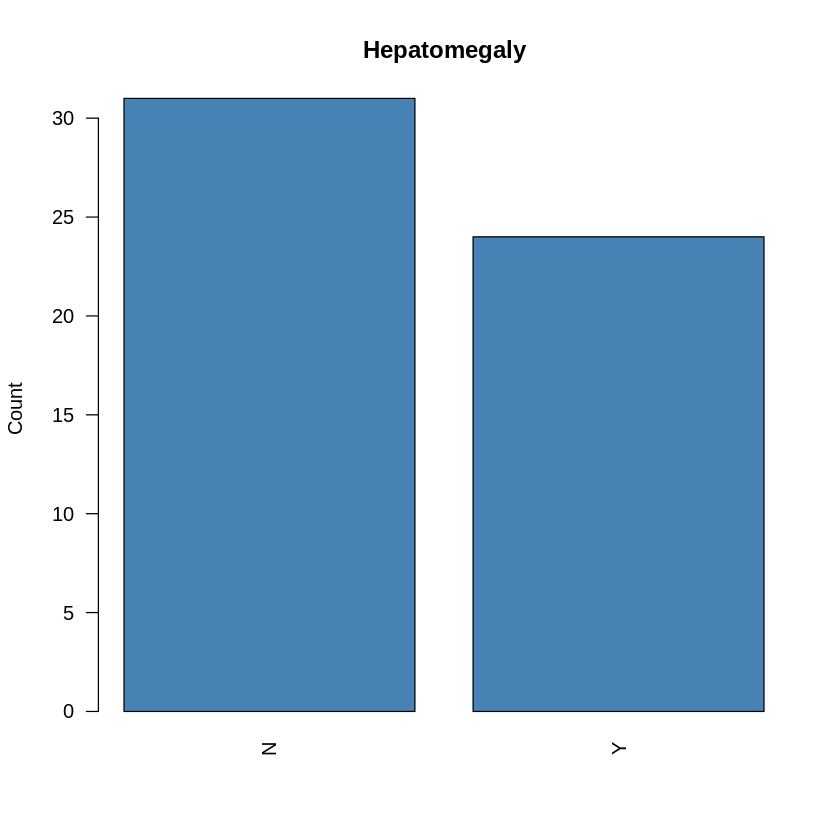

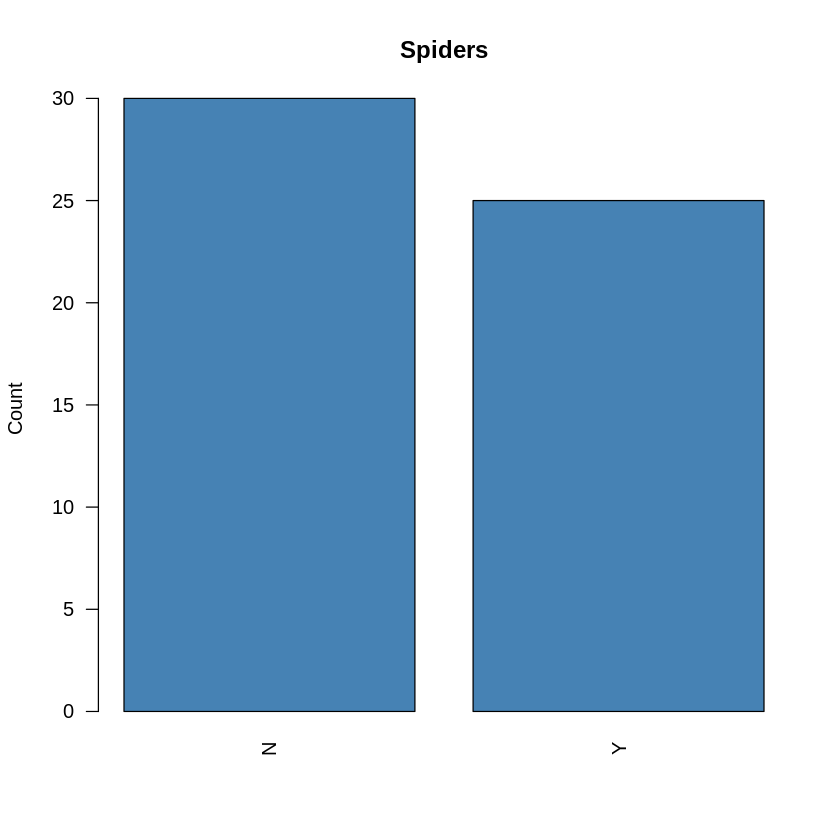

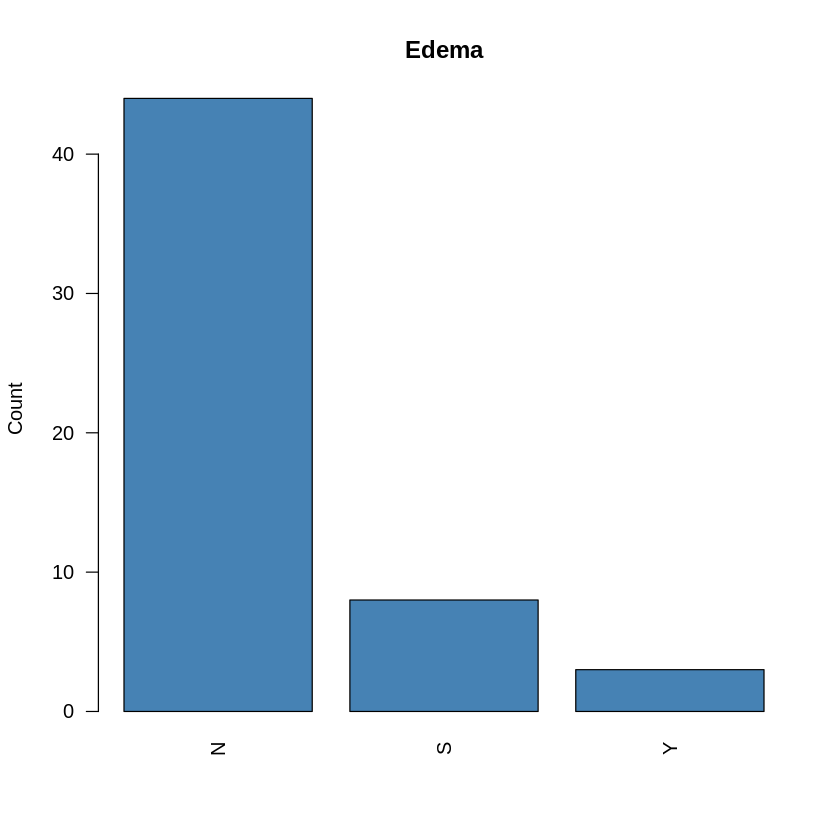

In [49]:
for (i in 1:7) {
plot(df.active[,i], main=colnames(df.active)[i],
ylab = "Count", col="steelblue", las = 2)
}

In [50]:
str(df.active)

'data.frame':	55 obs. of  7 variables:
 $ Status      : Factor w/ 3 levels "C","CL","D": 1 1 1 3 3 1 1 3 1 3 ...
 $ Drug        : Factor w/ 2 levels "D-penicillamine",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Sex         : Factor w/ 2 levels "F","M": 1 2 1 1 1 1 1 1 1 2 ...
 $ Ascites     : Factor w/ 2 levels "N","Y": 1 2 1 1 1 1 2 2 1 2 ...
 $ Hepatomegaly: Factor w/ 2 levels "N","Y": 2 1 1 1 2 1 1 1 1 1 ...
 $ Spiders     : Factor w/ 2 levels "N","Y": 1 2 1 1 1 1 2 2 1 2 ...
 $ Edema       : Factor w/ 3 levels "N","S","Y": 1 1 1 1 1 1 1 3 1 2 ...


In [51]:
res.mca <- MCA(df.active, graph = FALSE)

In [52]:
print(res.mca)

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 55 individuals, described by 7 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$var$eta2"       "coord. of variables"             
8  "$ind"            "results for the individuals"     
9  "$ind$coord"      "coord. for the individuals"      
10 "$ind$cos2"       "cos2 for the individuals"        
11 "$ind$contrib"    "contributions of the individuals"
12 "$call"           "intermediate results"            
13 "$call$marge.col" "weights of columns"              
14 "$call$marge.li"  "weights of 

In [53]:
head(res.mca$var$contrib)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
C,0.006481154,20.180224504,1.3935016,0.001184921,0.05764931
CL,0.212732879,0.124354157,31.7030834,2.888579889,9.14747823
D,0.074061072,31.262560911,0.4814934,0.468136181,0.72492374
D-penicillamine,9.067283128,0.498092121,1.6289121,29.030990027,4.09258031
Placebo,3.719911027,0.204345485,0.6682716,11.910149754,1.67900731
F,0.310771405,0.005702761,5.2118411,0.075375615,4.08057384


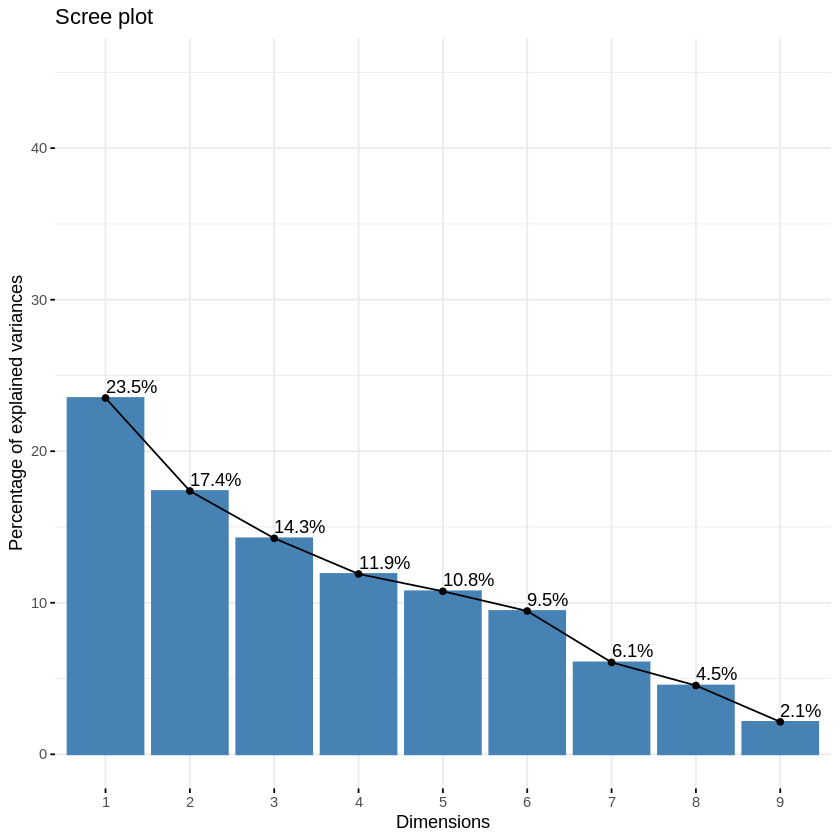

In [54]:
eig.val <- get_eigenvalue(res.mca)
fviz_screeplot(res.mca, addlabels = TRUE, ylim = c(0, 45))

In [71]:
#Purpose: The scree plot is used to visualize the explained variance of each principal component in PCA or dimension in MCA.
#X-axis: Represents the principal components (or dimensions) in order of their variance explained.
#Y-axis: Shows the percentage of variance explained by each component.
#Key Insight: The "elbow point" indicates the optimal number of components to retain. Beyond this point, additional components contribute less to explaining variance.
#Interpretation: In this plot, the first few components (e.g., 1 to 4) explain most of the variance, suggesting that these components capture most of the information in the data. Components beyond the fourth add less explanatory power.#

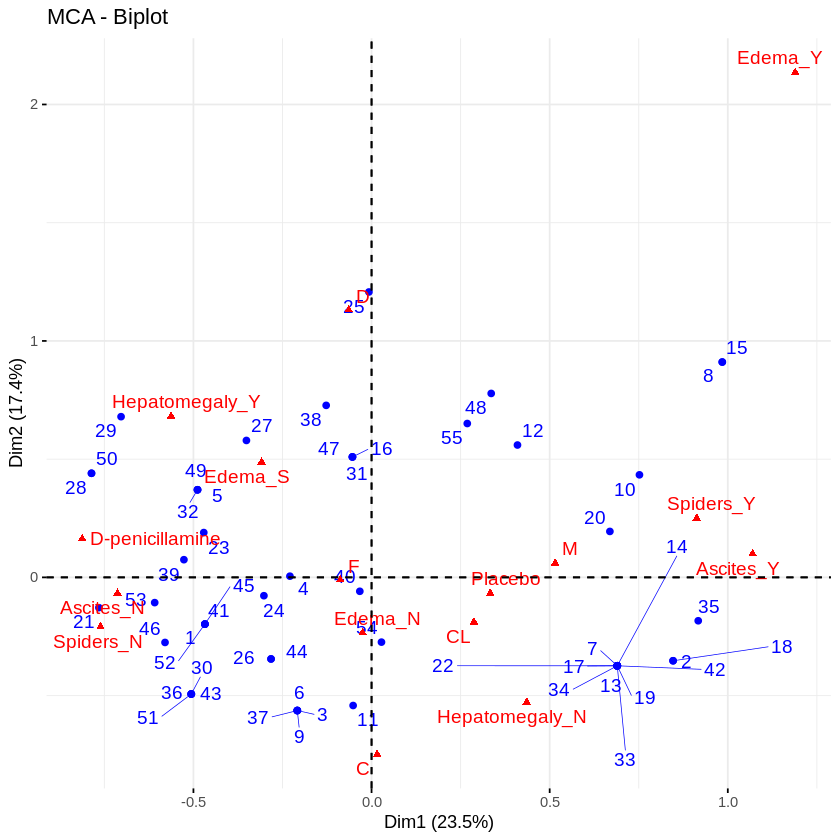

In [55]:
### Biplot
fviz_mca_biplot(res.mca,
repel = TRUE, # Avoid text overlapping (slow if many point)
ggtheme = theme_minimal())


In [72]:
#Purpose: The MCA biplot displays both the observations and variable categories in the same plot, showing their relationships in a reduced dimensional space.
#Axes (Dim1 and Dim2): Represent the first two dimensions that explain the most variance in the data.
#Proximity of Points: Categories or observations close to each other have similar response patterns.
#Key Categories: For instance, "Edema_Y" and "Edema_S" are separated, indicating distinct response patterns associated with these categories.
#Interpretation: The plot helps to identify clusters of similar categories and observations, showing how they are related in the context of the first two dimensions. Points farther from the origin are more influential in explaining the variability in the data.

In [56]:
var <- get_mca_var(res.mca)
var

Multiple Correspondence Analysis Results for variables
  Name       Description                  
1 "$coord"   "Coordinates for categories" 
2 "$cos2"    "Cos2 for categories"        
3 "$contrib" "contributions of categories"

In [57]:
#The different components can be accessed as follow:
# Coordinates
head(var$coord)
# Cos2: quality on the factore map
head(var$cos2)
# Contributions to the principal components
head(var$contrib)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
C,0.01559877,-0.74825529,-0.1780843,0.004745175,-0.03146728
CL,0.28727764,-0.18881529,2.7305050,0.753130014,1.27418649
D,-0.06406643,1.13154094,-0.1271857,-0.114594783,-0.13557495
D-penicillamine,-0.81212662,0.16362983,0.2680043,1.033854264,-0.36904689
Placebo,0.33318015,-0.06713019,-0.1099505,-0.424145339,0.15140385
F,-0.08772366,-0.01021554,-0.2797045,-0.030736534,0.21500800


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
C,0.0003142906,0.7231860490,0.040963961,2.908405e-05,0.001278995
CL,0.0047612564,0.0020568009,0.430134093,3.272335e-02,0.093666416
D,0.0025351366,0.7908259681,0.009991188,8.110919e-03,0.011352703
D-penicillamine,0.2705844694,0.0109845015,0.029467192,4.385045e-01,0.055875120
Placebo,0.2705844694,0.0109845015,0.029467192,4.385045e-01,0.055875120
F,0.0452107134,0.0006130989,0.459628429,5.550315e-03,0.271592091


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
C,0.006481154,20.180224504,1.3935016,0.001184921,0.05764931
CL,0.212732879,0.124354157,31.7030834,2.888579889,9.14747823
D,0.074061072,31.262560911,0.4814934,0.468136181,0.72492374
D-penicillamine,9.067283128,0.498092121,1.6289121,29.030990027,4.09258031
Placebo,3.719911027,0.204345485,0.6682716,11.910149754,1.67900731
F,0.310771405,0.005702761,5.2118411,0.075375615,4.08057384


In [ ]:
# Correlation between variables and principal dimensions

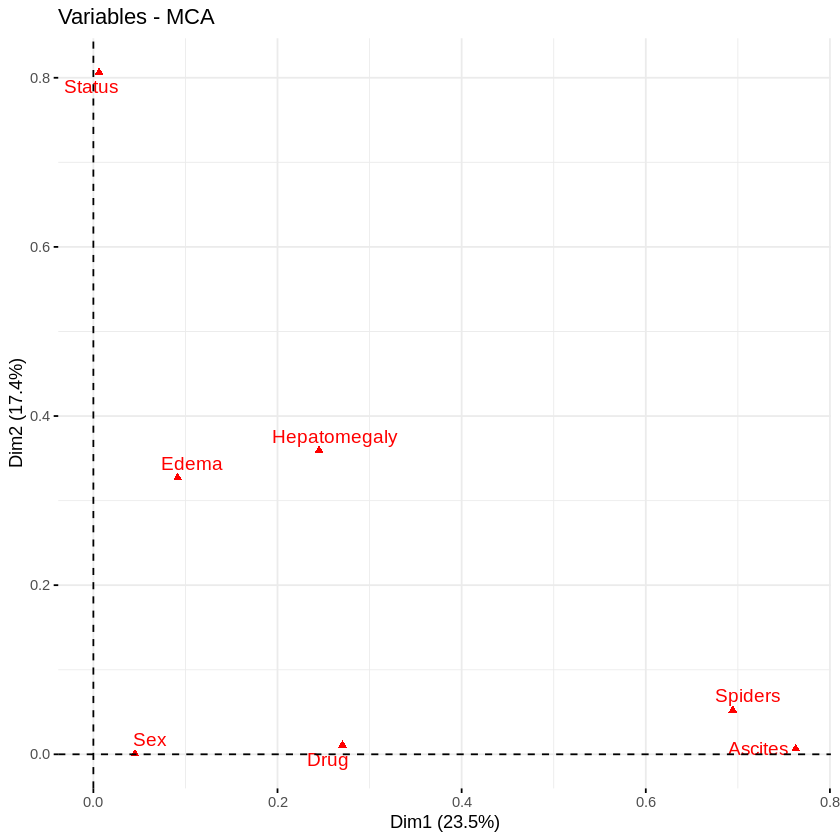

In [58]:
fviz_mca_var(res.mca, choice = "mca.cor",
repel = TRUE, # Avoid text overlapping (slow)
ggtheme = theme_minimal())

In [73]:
#Purpose: This plot shows how well the variables are represented by the first two dimensions.
#Distance from Origin: Variables farther from the origin contribute more to the dimensions.
#Key Variables: "Status" and "Spiders" are far from the origin, indicating strong contributions to the dimensions.
#Less Influential Variables: Variables like "Sex" and "Drug" are closer to the origin, contributing less.
#Interpretation: This plot highlights which variables have the most significant impact on the dimensions, guiding the understanding of underlying patterns in the data.

In [ ]:
#  Quality of representation of variable categories

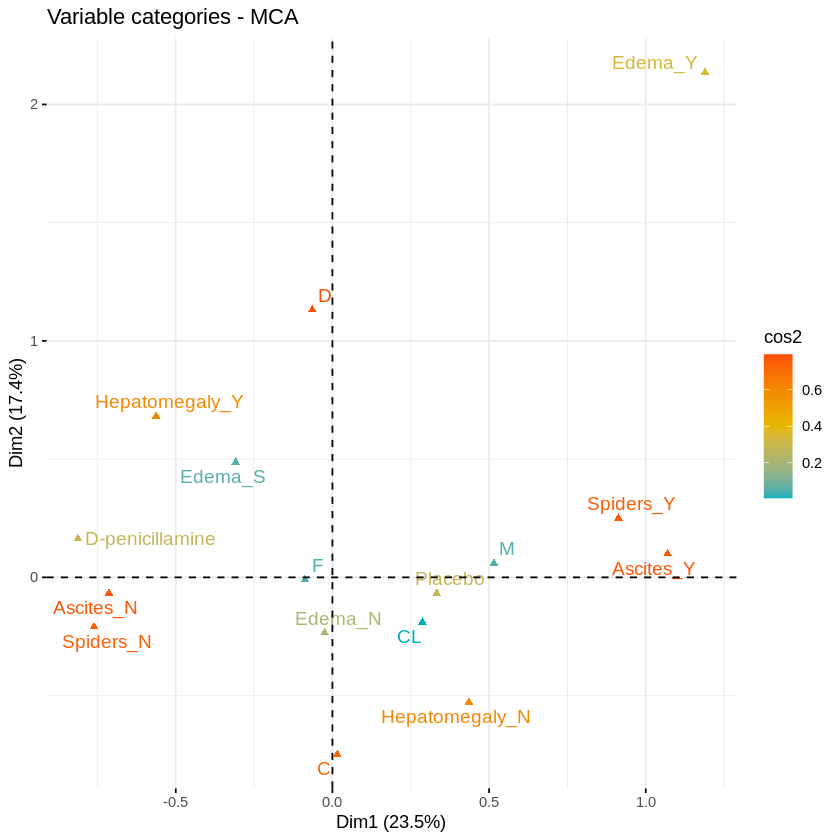

In [ ]:
# Color by cos2 values: quality on the factor map
fviz_mca_var(res.mca, col.var = "cos2",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE, # Avoid text overlapping
ggtheme = theme_minimal())

In [74]:
#Purpose: Displays the quality of representation of variable categories in the first two dimensions.
#Color Gradients: Represent the cos2 values (squared cosine), indicating the quality of representation. Darker colors mean better representation.
#High Cos2 Values: Categories like "Edema_Y" and "Spiders_Y" are well-represented.
#Low Cos2 Values: Categories with lighter colors have lower representation quality.
#Interpretation: This plot helps identify which categories are well-represented in the dimensions, ensuring that the most informative categories are considered in the analysis.

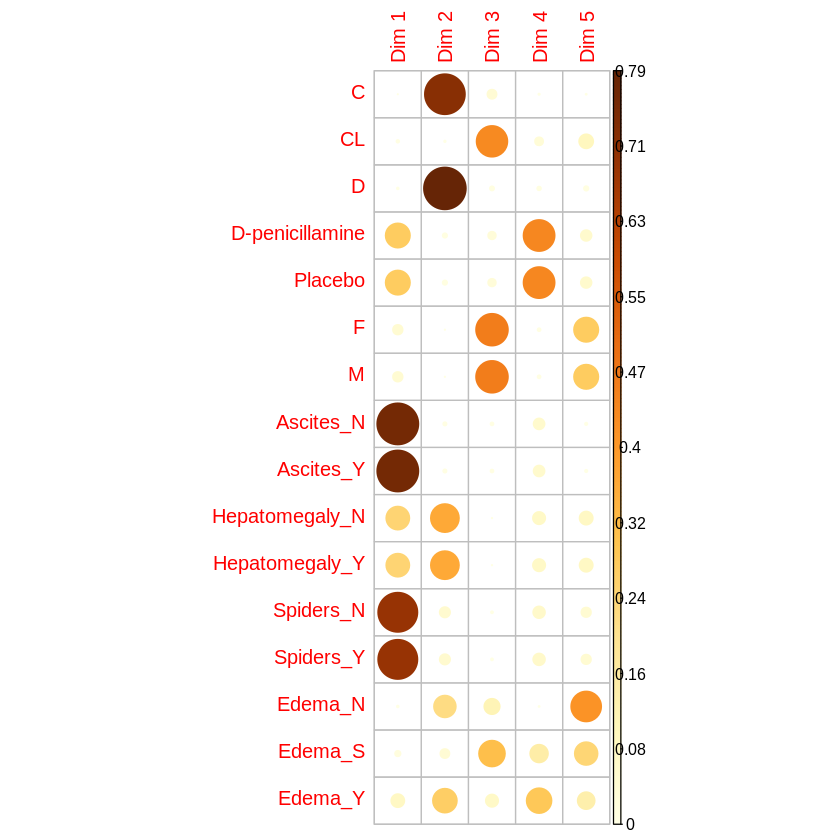

In [ ]:
corrplot(var$cos2, is.corr=FALSE)

In [77]:
#Purpose: Visualizes the quality of representation (cos2) of variables in different dimensions.
#Color Intensity: Darker colors indicate higher cos2 values, meaning better representation.
#Visualization: This heatmap shows the quality of representation (cos2) of variables across multiple dimensions. Each cell's color intensity indicates the cos2 value.
#High Cos2 Values: Variables like "Ascites_N," "Ascites_Y," "Spiders_N," and "D-penicillamine" show high cos2 values in certain dimensions (darker shades), indicating they are well-represented.
#Low Cos2 Values: Variables with lighter shades in certain dimensions have lower cos2 values, meaning they are not as well-represented by those dimensions.
#Interpretation: This helps in identifying which variables are well-represented in each dimension, indicating their relevance in explaining the variance captured by those dimensions.

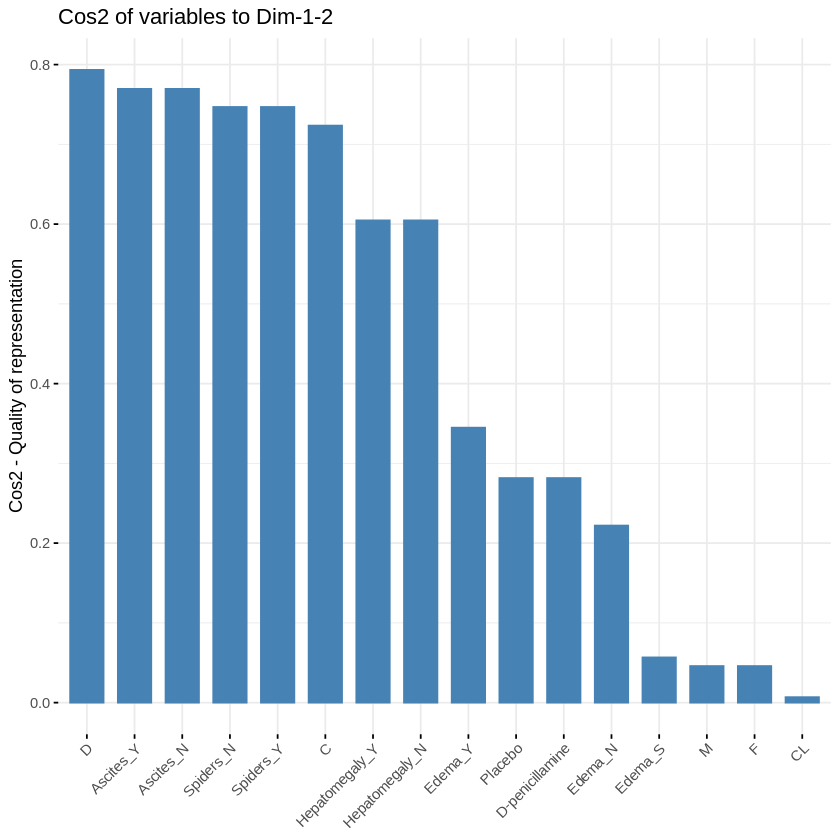

In [ ]:
# Cos2 of variable categories on Dim.1 and Dim.2
fviz_cos2(res.mca, choice = "var", axes = 1:2)

In [78]:
#Visualization: This bar plot displays the cos2 values for each variable in the combined first two dimensions.
#High Cos2 Values: "D," "Ascites_Y," "Spiders_Y," and "Spiders_N" have the highest cos2 values, indicating they are well-represented by Dim-1 and Dim-2.
#Mid-range Cos2 Values: Variables like "Hepatomegaly_Y" and "Hepatomegaly_N" have moderate cos2 values.
#Low Cos2 Values: "F" and "CL" have the lowest cos2 values, indicating poor representation in the first two dimensions.
#Interpretation: This graph highlights which variables are most effectively captured by the first two dimensions, which are typically the most important in explaining the data's variance.

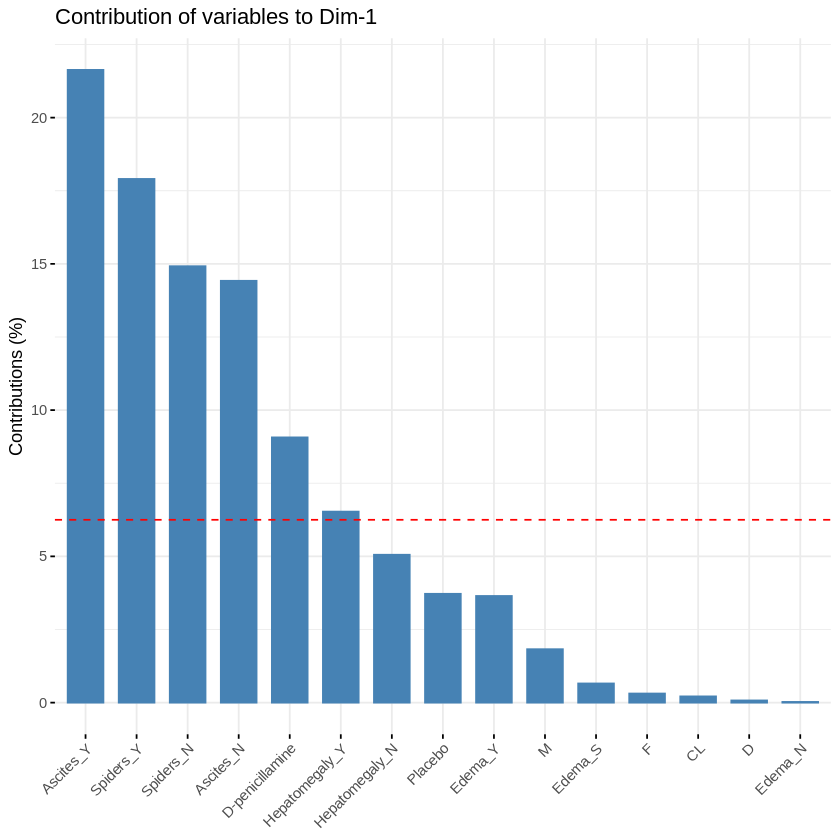

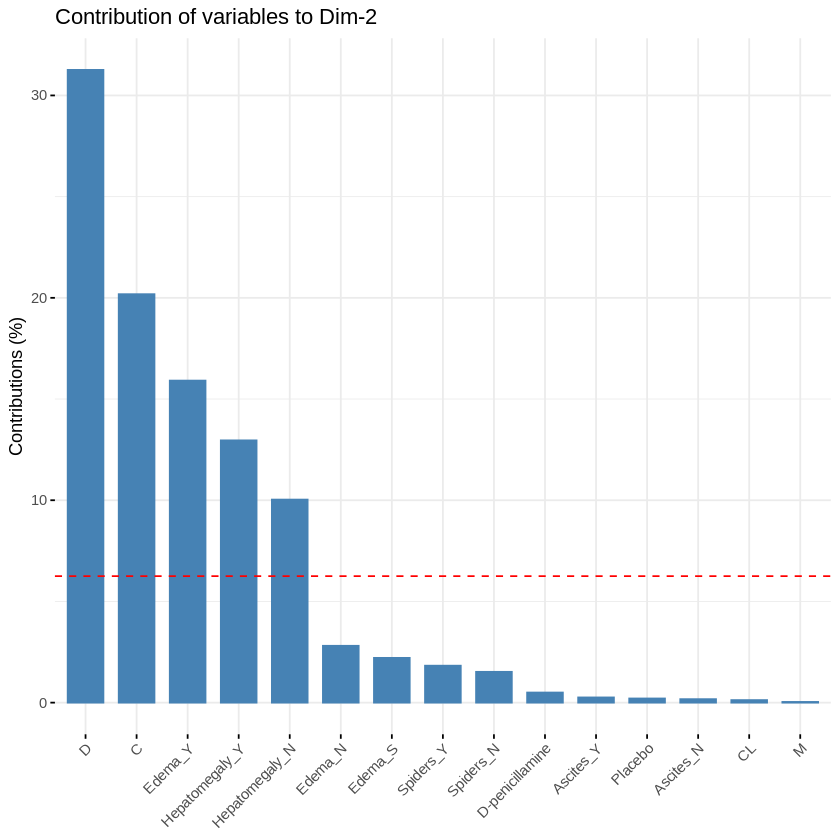

In [ ]:
# Contribution of variable categories to the dimensions
# Contributions of rows to dimension 1
fviz_contrib(res.mca, choice = "var", axes = 1, top = 15)
# Contributions of rows to dimension 2
fviz_contrib(res.mca, choice = "var", axes = 2, top = 15)

In [79]:
#Visualization: This bar plot shows the contribution of each variable to the first dimension (Dim-1).
#High Contributions: "Ascites_Y," "Spiders_Y," "Spiders_N," and "Ascites_N" have the highest contributions, meaning they significantly define Dim-1.
#Moderate Contributions: Variables like "D-penicillamine" and "Hepatomegaly_Y" contribute moderately to Dim-1.
#Low Contributions: "Edema_N" and "Edema_S" have the lowest contributions.
#Interpretation: This graph identifies which variables play a significant role in defining the first dimension, helping in understanding the dimension's composition.

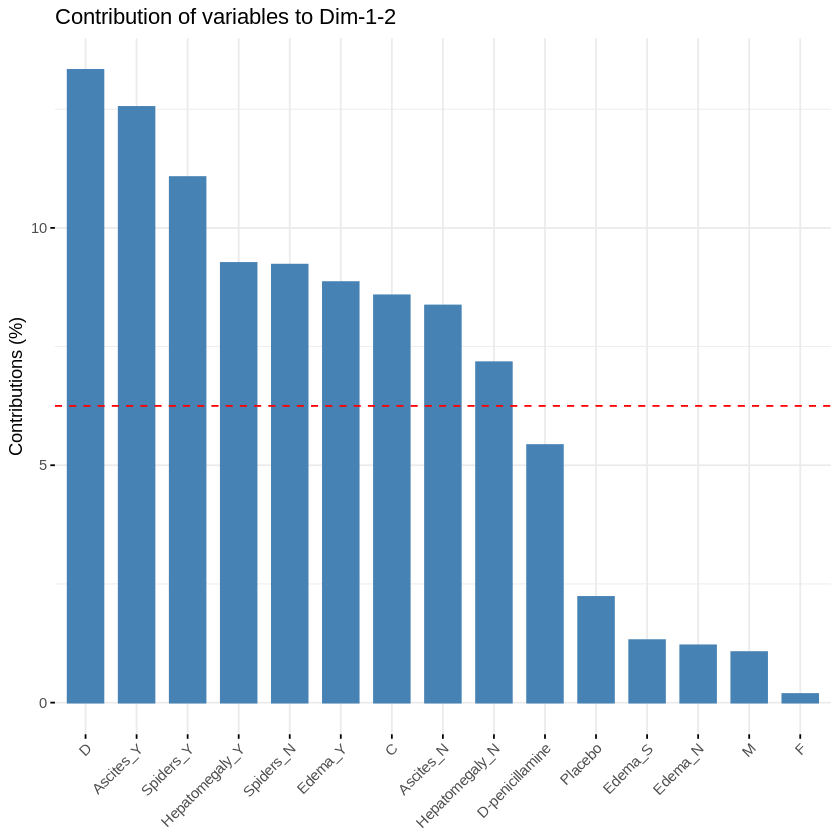

In [ ]:
# Total contribution to dimension 1 and 2
fviz_contrib(res.mca, choice = "var", axes = 1:2, top = 15)

In [80]:
#Visualization: This bar plot displays the total contribution of each variable to the first two dimensions combined.
#High Contributions: "D," "Ascites_Y," "Spiders_Y," and "Spiders_N" have the highest contributions, indicating their overall importance in the first two dimensions.
#Moderate Contributions: Variables like "Hepatomegaly_Y," "Hepatomegaly_N," and "C" contribute moderately to the combined dimensions.
#Low Contributions: "Edema_N" and "F" have the lowest contributions, indicating less importance in the first two dimensions.
#Interpretation: This graph helps in identifying key variables that influence the primary variance in the data, highlighting the most significant contributors to the combined first two dimensions.

In [59]:
###################################################################################################################################################
 ##############################################    Graph of individuals    #########################################################################
 ####################################################################################################################################################

In [ ]:
ind <- get_mca_ind(res.mca)
ind

Multiple Correspondence Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

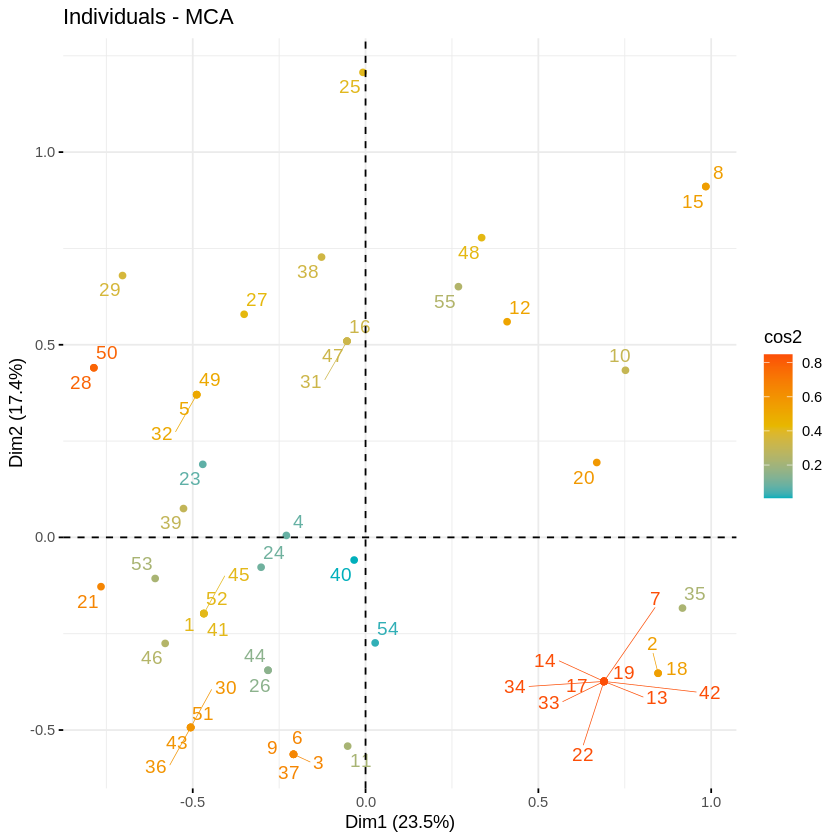

In [ ]:
fviz_mca_ind(res.mca, col.ind = "cos2",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE, # Avoid text overlapping (slow if many points)
ggtheme = theme_minimal())


In [76]:
#Purpose: Shows the individuals in a multi-dimensional space, colored by cos2 values indicating their quality of representation.
#Color Gradient: Darker colors indicate higher cos2 values, meaning better representation.
#Proximity of Points: Individuals close to each other have similar response patterns.
#Key Insight: Points with higher cos2 values are better represented by the dimensions.
#Interpretation: This plot visualizes individual observations' behavior in the multi-dimensional space and their quality of representation, identifying well-represented individuals and potential clusters.

In [60]:
# Dimension description
res.desc <- dimdesc(res.mca, axes = c(1,2))
# Description of dimension 1
res.desc[[1]]
# Description of dimension 2
res.desc[[2]]

,R2,p.value
Ascites,0.7628781,3.395110e-18
Spiders,0.6945330,2.917774e-15
Drug,0.2705845,4.690522e-05
Hepatomegaly,0.2451502,1.215247e-04
,Estimate,p.value
Ascites=Ascites_Y,0.4901249,3.395110e-18
Spiders=Spiders_Y,0.4601117,2.917774e-15
Drug=Placebo,0.3148521,4.690522e-05
Hepatomegaly=Hepatomegaly_N,0.2744588,1.215247e-04
Edema=Edema_Y,0.4970407,3.451695e-02


,R2,p.value
Status,0.8063909,2.884480e-19
Hepatomegaly,0.3594959,1.317123e-06
Edema,0.3272830,3.339200e-05
,Estimate,p.value
Status=D,0.5041813,1.202552e-19
Hepatomegaly=Hepatomegaly_Y,0.2857133,1.317123e-06
Edema=Edema_Y,0.6330768,6.209714e-05
Edema=Edema_N,-0.4871119,3.090849e-04
Hepatomegaly=Hepatomegaly_N,-0.2857133,1.317123e-06
Status=C,-0.3842996,2.104439e-16


# Factor Analysis (for mixed type )

In [61]:
categorical_features

[1] "Status"       "Drug"         "Sex"          "Ascites"      "Hepatomegaly"
[6] "Spiders"      "Edema"

In [62]:
df[categorical_features] <- lapply(df[categorical_features], factor)
str(df)

'data.frame':	25000 obs. of  19 variables:
 $ N_Days       : int  2221 1230 4184 2090 2105 4427 1418 51 2504 1012 ...
 $ Status       : Factor w/ 3 levels "C","CL","D": 1 1 1 3 3 1 1 3 1 3 ...
 $ Drug         : Factor w/ 2 levels "D-penicillamine",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Age          : int  18499 19724 11839 16467 21699 16418 23011 24107 15265 22280 ...
 $ Sex          : Factor w/ 2 levels "F","M": 1 2 1 1 1 1 1 1 1 2 ...
 $ Ascites      : Factor w/ 2 levels "N","Y": 1 2 1 1 1 1 2 2 1 2 ...
 $ Hepatomegaly : Factor w/ 2 levels "N","Y": 2 1 1 1 2 1 1 1 1 1 ...
 $ Spiders      : Factor w/ 2 levels "N","Y": 1 2 1 1 1 1 2 2 1 2 ...
 $ Edema        : Factor w/ 3 levels "N","S","Y": 1 1 1 1 1 1 1 3 1 2 ...
 $ Bilirubin    : num  0.5 0.5 0.5 0.7 1.9 1.9 1.3 12.6 2.3 1.4 ...
 $ Cholesterol  : num  149 219 320 255 486 ...
 $ Albumin      : num  4.04 3.93 3.54 3.74 3.54 3.7 3.44 2.74 3.93 3.48 ...
 $ Copper       : num  227 22 51 23 74 281 75 140 24 210 ...
 $ Alk_Phos     : num  598 663 

In [63]:
famd <-FAMD(df,graph=FALSE)

In [64]:
famd

*The results are available in the following objects:

  name          description                             
1 "$eig"        "eigenvalues and inertia"               
2 "$var"        "Results for the variables"             
3 "$ind"        "results for the individuals"           
4 "$quali.var"  "Results for the qualitative variables" 
5 "$quanti.var" "Results for the quantitative variables"

In [65]:
eig.val <- get_eigenvalue(famd)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.759955,17.904549,17.90455
Dim.2,2.127270,10.129855,28.03440
Dim.3,1.577340,7.511143,35.54555
Dim.4,1.267929,6.037759,41.58331
Dim.5,1.197445,5.702121,47.28543


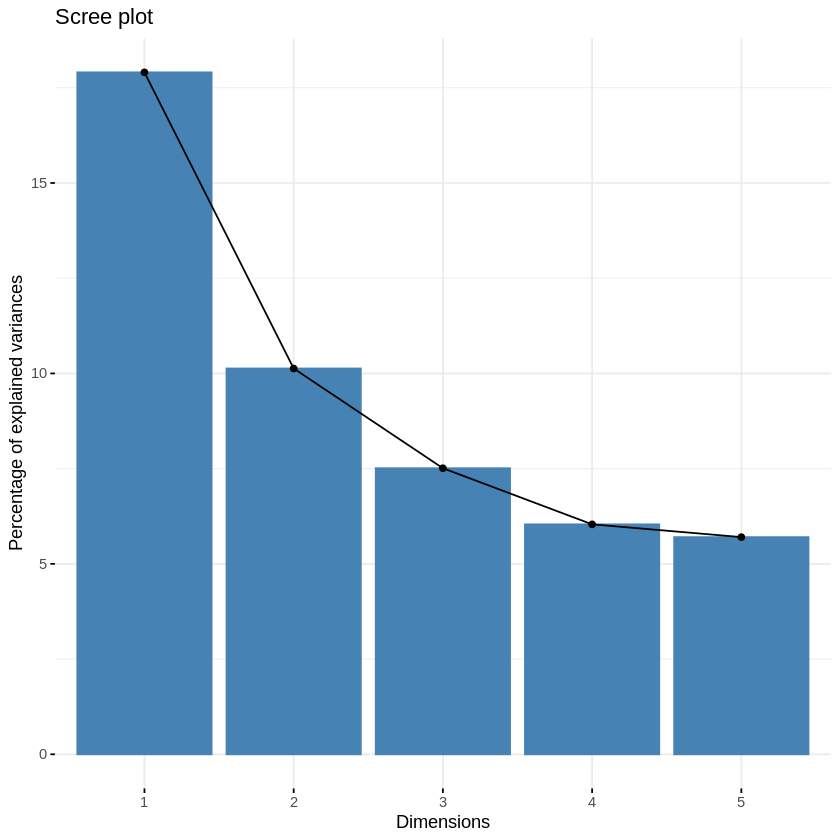

In [66]:
fviz_screeplot(famd)


In [81]:
#The scree plot displays the percentage of explained variances by the components.
#The first dimension (Dim1) explains about 18% of the variance, followed by Dim2 with around 12%, Dim3 with around 10%, and so on.
#The plot shows a sharp decline after the first component, suggesting that the first few components capture most of the variance in the data.

In [70]:
############ So from the above scree plot , it is  obviuos that FA couldnt capture a considerable amount of variation of our entire data set
##  as all the 5 Dimensions combined it explain only 47% of total variance

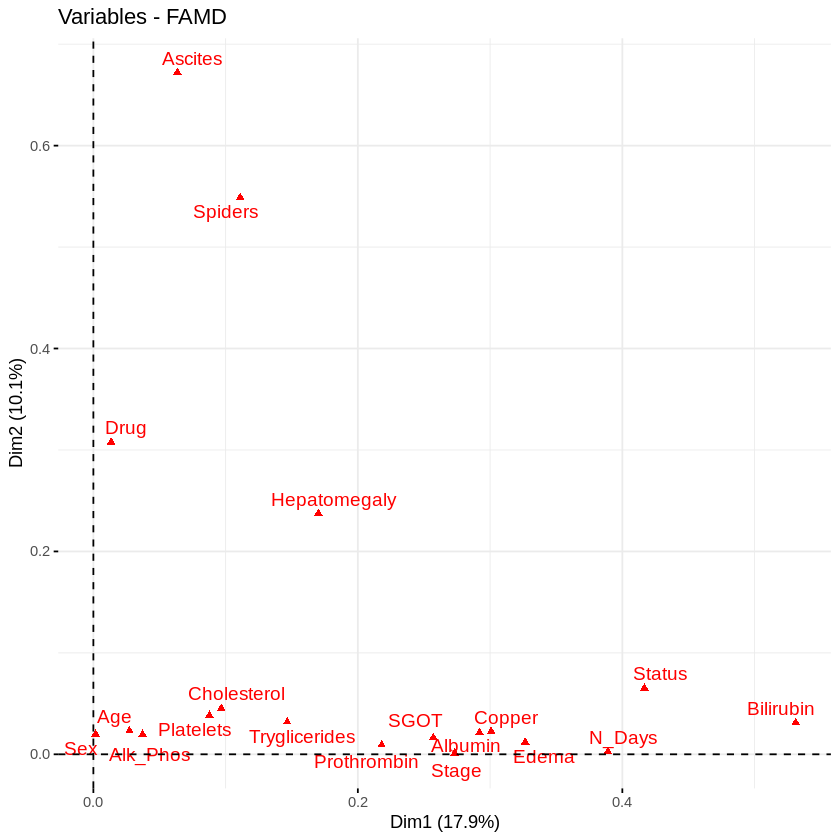

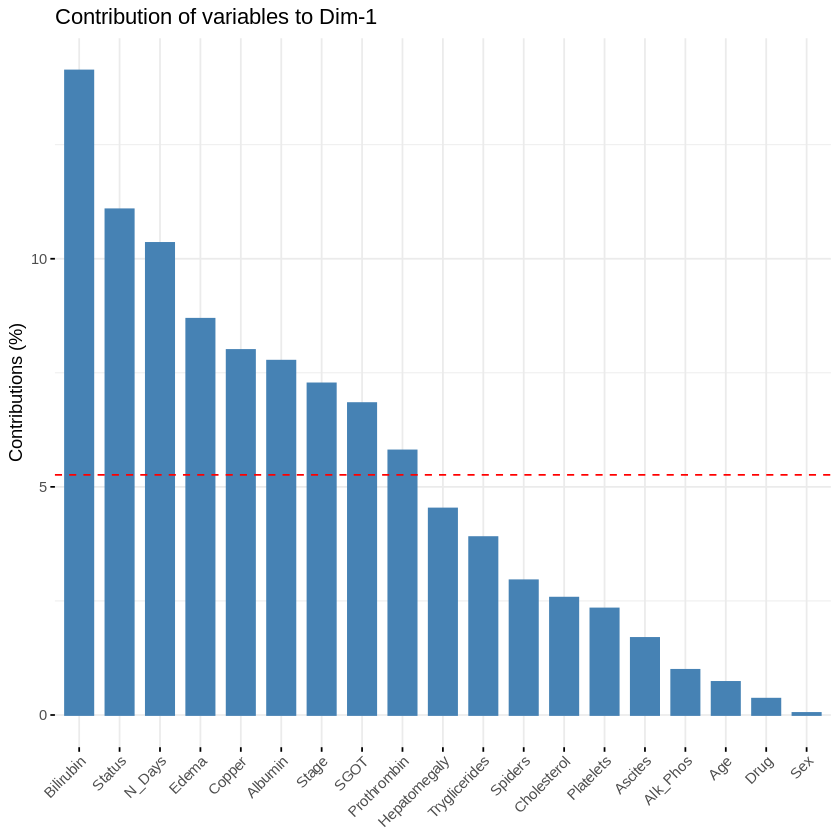

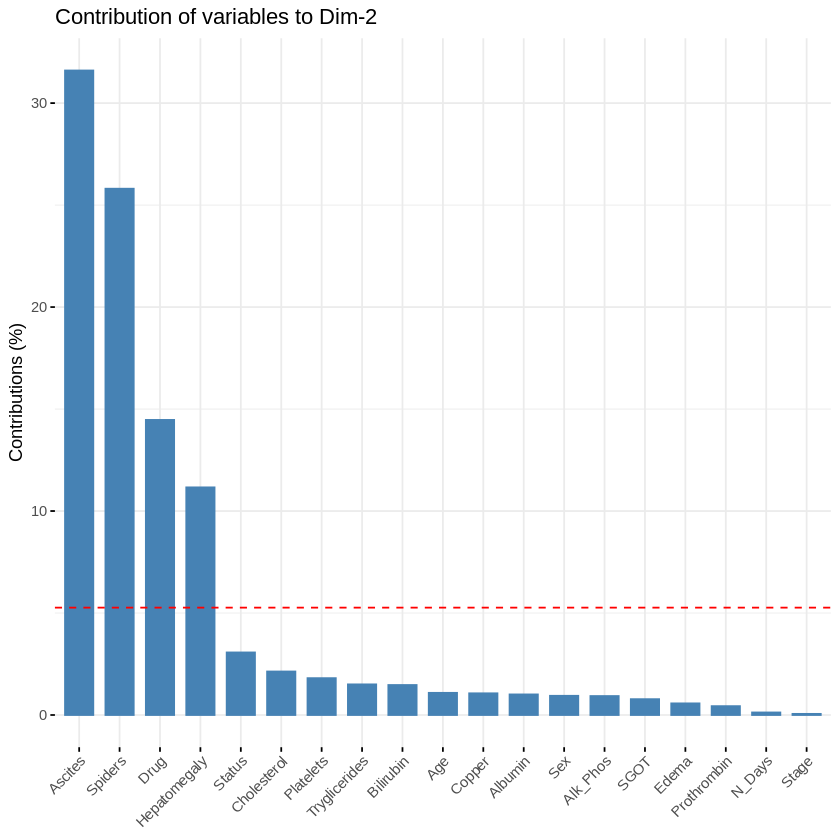

In [67]:
# Plot of variables
fviz_famd_var(famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(famd, "var", axes = 2)

In [82]:
#1)This plot represents the relationships between the variables in the FAMD (Factor Analysis of Mixed Data).
#Variables such as "Ascites," "Spiders," "Drug," and "Hepatomegaly" are positioned far from the center, indicating that they are well represented by the first two dimensions.
#Variables closer to the origin (e.g., "Age," "Sex," "Cholesterol") have smaller contributions to these dimensions.

In [85]:
#2)This bar plot shows the contribution of each variable to the first dimension (Dim1).
#"Bilirubin" and "Status" have the highest contributions, followed by "N_days" and "Edema."
#Contributions are measured as a percentage, with "Bilirubin" contributing over 15%, "Status" around 10%, and the others less.

In [83]:
#3)This bar plot shows the contribution of each variable to the second dimension (Dim2).
#"Ascites" and "Spiders" have the highest contributions, followed by "Drug" and "Hepatomegaly."
#Contributions are measured as a percentage, with "Ascites" contributing over 30%, "Spiders" around 28%, and the others less.

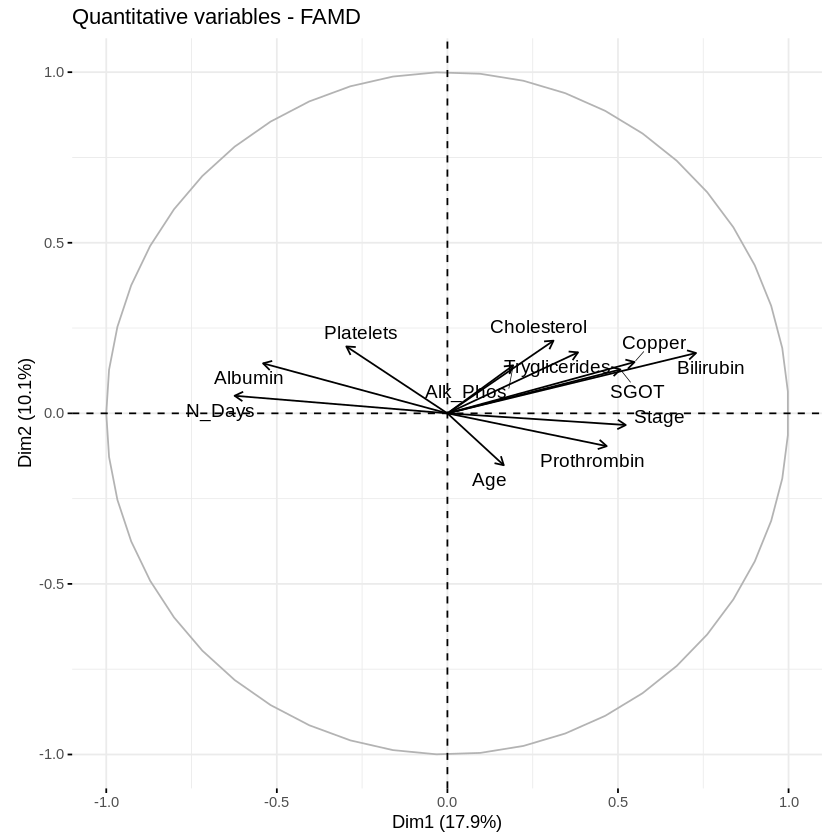

In [68]:
fviz_famd_var(famd, "quanti.var", repel = TRUE,
col.var = "black")

In [86]:
#This plot shows the relationships between the quantitative variables in the context of FAMD.
#Variables like "Bilirubin," "SGOT," and "Copper" have vectors pointing in similar directions, indicating a positive correlation.
#Variables that are far from the center and have longer vectors (e.g., "Bilirubin") are better represented in the first two dimensions.

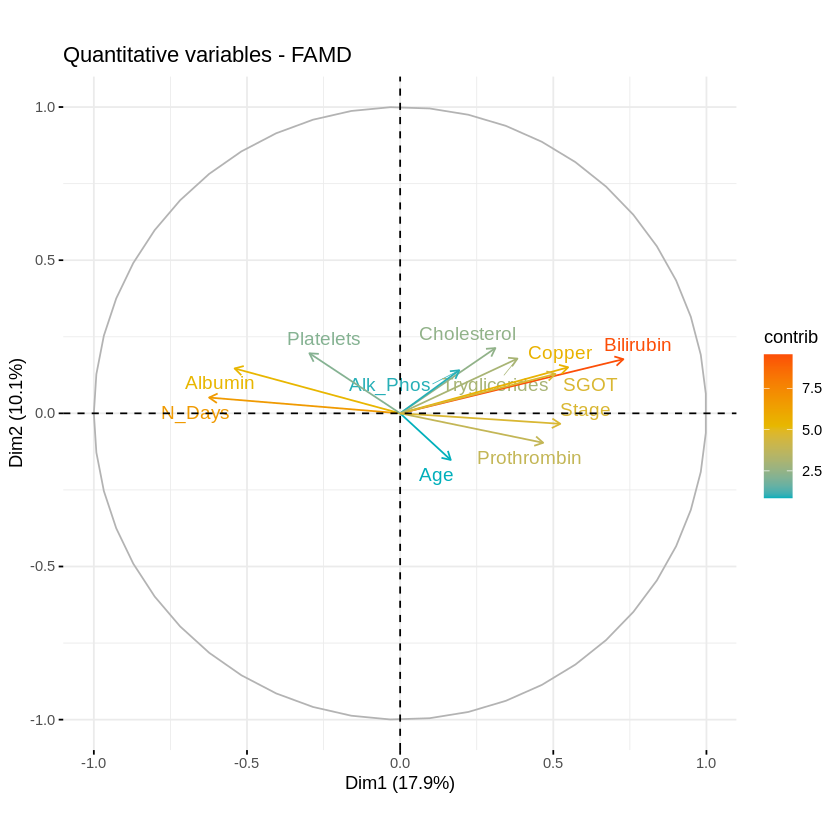

In [69]:
fviz_famd_var(famd, "quanti.var", col.var = "contrib",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE)

In [87]:
#This plot is similar to the previous one but includes a color gradient to indicate the contribution of each variable.
#"Bilirubin" and "SGOT" have higher contributions, as indicated by the red and orange colors.
#The color gradient helps to quickly identify the most influential variables in the first two dimensions.